# Laboratorio 2 - Agrupación

## Integrantes - Grupo 19
* Carol Sofía Florido Castro - 202111430
* Juan Martin Vasquez Cristancho - 202113314
* Natalia Villegas Calderon - 202113370


## Objetivos
* Aplicar el proceso de aprendizaje para resolver una tarea de agrupación, desde la preparación de los datos hasta la interpretación de los resultados.
* Aplicar tres algoritmos de clústering (k-means y dos de libre elección) para resolver el objetivo de la organización.
* Determinar los hiperparámetros para la construcción de los modelos dependiendo de los algoritmos utilizados.
* Construir una tabla comparativa que muestre el rendimiento de los tres modelos de agrupación.
* Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización.
* Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.

## Caso de Negocio: FinanzasAlpes

La agrupación es una técnica de aprendizaje no supervisado que permite identificar patrones y tendencias en los datos con base en la identificación de grupos o segmentos de objetos con características comunes. Por ejemplo, para el caso una empresa que ofrece servicios de tarjetas de crédito, la segmentación de clientes facilitaría la personalización de productos y servicios de acuerdo con las necesidades y comportamientos específicos de cada grupo identificado. Además, se podrían dirigir campañas de marketing a segmentos particulares, optimizando la comunicación y mejorando la experiencia de los clientes a través de un servicio de atención más ajustado a sus preferencias y hábitos.
En este marco, FinanzasAlpes, una empresa emisora de tarjetas de crédito, busca segmentar a sus clientes según su comportamiento de compra en centros comerciales, con el objetivo de identificar los distintos perfiles de tarjetahabientes y desarrollar estrategias de marketing personalizadas para cada segmento. Para llevar a cabo este estudio, la empresa nos ha contratado como científicos de datos y nos ha proporcionado un conjunto de datos sobre sus clientes, que incluye información detallada sobre saldos, límites de crédito, hábitos de compra y otros aspectos relevantes.



## Datos:
Se trabaja con un conjunto de datos que contiene 8950 registros de clientes bancarios con los siguientes atributos:

- **ID**: Identificador del cliente.
- **SALDO**: Saldo medio mensual (basado en los saldos medios diarios).
- **F_SALDO**: Relación de los últimos 12 meses con el saldo. (Entre 0 y 1, donde 1: Se actualiza con frecuencia, 0: No se actualiza con frecuencia).
- **COMPRAS**: Importe total de las compras realizadas en los últimos 12 meses.
- **COMPRAS_PUNTUALES**: Importe total de las compras puntuales.
- **COMPRAS_PLAZOS**: Importe total de las compras a plazos.
- **AVANCE_EFECTIVO**: Importe total de avance en efectivo.
- **F_COMPRAS**: Frecuencia de compras (Porcentaje de meses con al menos una compra). (Entre 0 y 1 donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_COMPRAS_PUNTUALES**: Frecuencia de las compras puntuales. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_COMPRAS_PLAZOS**: Frecuencia de compra a plazos. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **F_AVANCE_EFECTIVO**: Frecuencia de los avances en efectivo. (Entre 0 y 1, donde 1: compró con frecuencia, 0: no compró con frecuencia).
- **P_AVANCE_EFECTIVO**: Importe medio por operación de avance en efectivo.
- **P_COMPRAS**: Importe medio por operación de compra.
- **LÍMITE_CREDITO**: Límite de crédito.
- **PAGOS**: Pagos totales (importe pagado por el cliente para reducir el saldo de su extracto en el periodo).
- **PAGOS_MINIMOS**: Total pagos mínimos en el periodo.
- **F_PAGOS_COMPLETOS**: Porcentaje de meses con pago completo del saldo vencido.
- **MESES_CLIENTE**: Número de meses como cliente.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler


# 0. Carga y manipulación básica de datos

In [2]:
df = pd.read_csv("202510_Laboratorio 2 - Agrupación_Customer_Data.csv", delimiter=";",encoding="latin1")
df.head()

ID         SALDO   F_SALDO      COMPRAS  COMPRAS_PUNTUALES  \
0  C10001   5323.148883  0.250693  26344.07220       38237.442520   
1  C10002  12726.638120  0.791307  37958.51902        5690.742440   
2  C10003   4305.572068  0.176531  28392.95334       36009.470090   
3  C10004   4740.988511  0.178076  27399.00384       38246.863490   
4  C10005  13820.920640  0.826914  42214.02163        7341.007821   

   COMPRAS_PLAZOS  AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  \
0     3727.113162     15708.239680   0.496536             0.464442   
1    18733.810960     38284.354430   0.699457             0.250327   
2     2873.383232     14294.185030   0.419764             0.523662   
3     3402.853375      6936.812518   0.439666             0.606597   
4    19273.070990     40091.347850   0.821412             0.283579   

   F_COMPRAS_PLAZOS  F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  \
0          0.821611           0.194502                100         77   
1          0.654863           1.083902                 78        156   
2          0.899912           0.207049                 72         81   
3          0.783129           0.228299                 78         83   
4          0.501361           1.106350                 88        182   

   LÍMITE_CREDITO         PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  \
0     16819.48004  21337.027460    39452.95812           0.817907   
1     15617.57058   8000.183624    63013.74848           0.343119   
2     15515.58621  27111.360490            NaN           0.829074   
3     12926.58797  23919.113400    38444.21998           0.883984   
4     14404.70507   6994.688474    62041.61734           0.383186   

   MESES_CLIENTE  
0              7  
1              9  
2              6  
3              7  
4             10

Se evidencia que el conjunto de datos tiene 8950 registros y 18 columnas.

In [3]:
df.shape

(8950, 18)

Se observan los tipos de datos cargados

In [4]:
df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

Como se evidencia los tipos de datos coinciden con la información descrita en el diccionario de los mismos.

# 1. Entendimiento de los datos

Se cuenta con las siguientes variables

In [5]:
column_titles = df.columns.tolist()
column_titles

['ID',
 'SALDO',
 'F_SALDO',
 'COMPRAS',
 'COMPRAS_PUNTUALES',
 'COMPRAS_PLAZOS',
 'AVANCE_EFECTIVO',
 'F_COMPRAS',
 'F_COMPRAS_PUNTUALES',
 'F_COMPRAS_PLAZOS',
 'F_AVANCE_EFECTIVO',
 'P_AVANCE_EFECTIVO',
 'P_COMPRAS',
 'LÍMITE_CREDITO',
 'PAGOS',
 'PAGOS_MINIMOS',
 'F_PAGOS_COMPLETOS',
 'MESES_CLIENTE']

## 1.1 Atributos númericos y categóricos

### 1.1.1 Atributos numéricos

In [6]:
atributosNum = df.select_dtypes(include=[np.number]).columns
pd.DataFrame(atributosNum, columns=['Atributos numéricos'])

Atributos numéricos
0                 SALDO
1               F_SALDO
2               COMPRAS
3     COMPRAS_PUNTUALES
4        COMPRAS_PLAZOS
5       AVANCE_EFECTIVO
6             F_COMPRAS
7   F_COMPRAS_PUNTUALES
8      F_COMPRAS_PLAZOS
9     F_AVANCE_EFECTIVO
10    P_AVANCE_EFECTIVO
11            P_COMPRAS
12       LÍMITE_CREDITO
13                PAGOS
14        PAGOS_MINIMOS
15    F_PAGOS_COMPLETOS
16        MESES_CLIENTE

A continuación, se presentan las descripciones de los atributos numéricos, detallando la media, la desviación estaándar, el mínimo, el máximo y los cuartiles. Estos valores luego se analizaran en la sección de Análisis de Consistencia y Análisis de Validez.

In [7]:
df[atributosNum].describe()

SALDO      F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
count   8950.000000  8950.000000   8950.000000        8950.000000   
mean    9382.387900     0.459205  30525.873439       22913.665720   
std     5118.113559     0.282998  11041.410943       13573.919086   
min        0.000000     0.000000      0.000000           0.000000   
25%     4275.036859     0.188490  27106.651598        6698.252490   
50%    12007.718810     0.306650  30934.582275       31011.033490   
75%    13740.565878     0.756061  39825.160795       34495.416422   
max    19043.138560     1.000000  49039.570000       40761.250000   

       COMPRAS_PLAZOS  AVANCE_EFECTIVO    F_COMPRAS  F_COMPRAS_PUNTUALES  \
count     8950.000000      8950.000000  8950.000000          8950.000000   
mean     11407.851805     22573.474202     0.559810             0.478032   
std       7087.102996     12594.295895     0.214055             0.221873   
min          0.000000         0.000000     0.000000             0.000000   
25%       3736.720194     10944.431108     0.407273             0.250856   
50%      10832.141085     19465.792260     0.505305             0.533521   
75%      19127.083038     36150.722568     0.777084             0.649120   
max      22500.000000     47137.211760     1.000000             1.000000   

       F_COMPRAS_PLAZOS  F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO    P_COMPRAS  \
count       8950.000000        8950.000000        8950.000000  8950.000000   
mean           0.623916           0.734946          76.169162   164.981453   
std            0.208207           0.422563          22.260935    71.322003   
min            0.000000           0.000000           0.000000     0.000000   
25%            0.518231           0.230716          65.000000    97.000000   
50%            0.607608           0.947651          82.000000   176.000000   
75%            0.814929           1.029172          92.000000   216.000000   
max            1.000000           1.500000         123.000000   358.000000   

       LÍMITE_CREDITO         PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  \
count     8949.000000   8950.000000    8637.000000        8950.000000   
mean     14696.640361  19824.347218   44222.977795           0.545414   
std       5537.074673  11069.268177   15468.314241           0.267443   
min         50.000000      0.000000    1006.064965           0.000000   
25%      13487.727310   9329.603116   31572.127680           0.336732   
50%      14942.545350  21367.621275   48780.271750           0.432690   
75%      16269.727120  25219.127372   57761.175980           0.815178   
max      30000.000000  50721.483360   76406.207520           1.000000   

       MESES_CLIENTE  
count    8950.000000  
mean        8.370615  
std         1.756035  
min         6.000000  
25%         7.000000  
50%         8.000000  
75%        10.000000  
max        12.000000

Se generan las graficas boxplot para evidenciar como se distribuyen los datos en cada una de las variables numéricas.

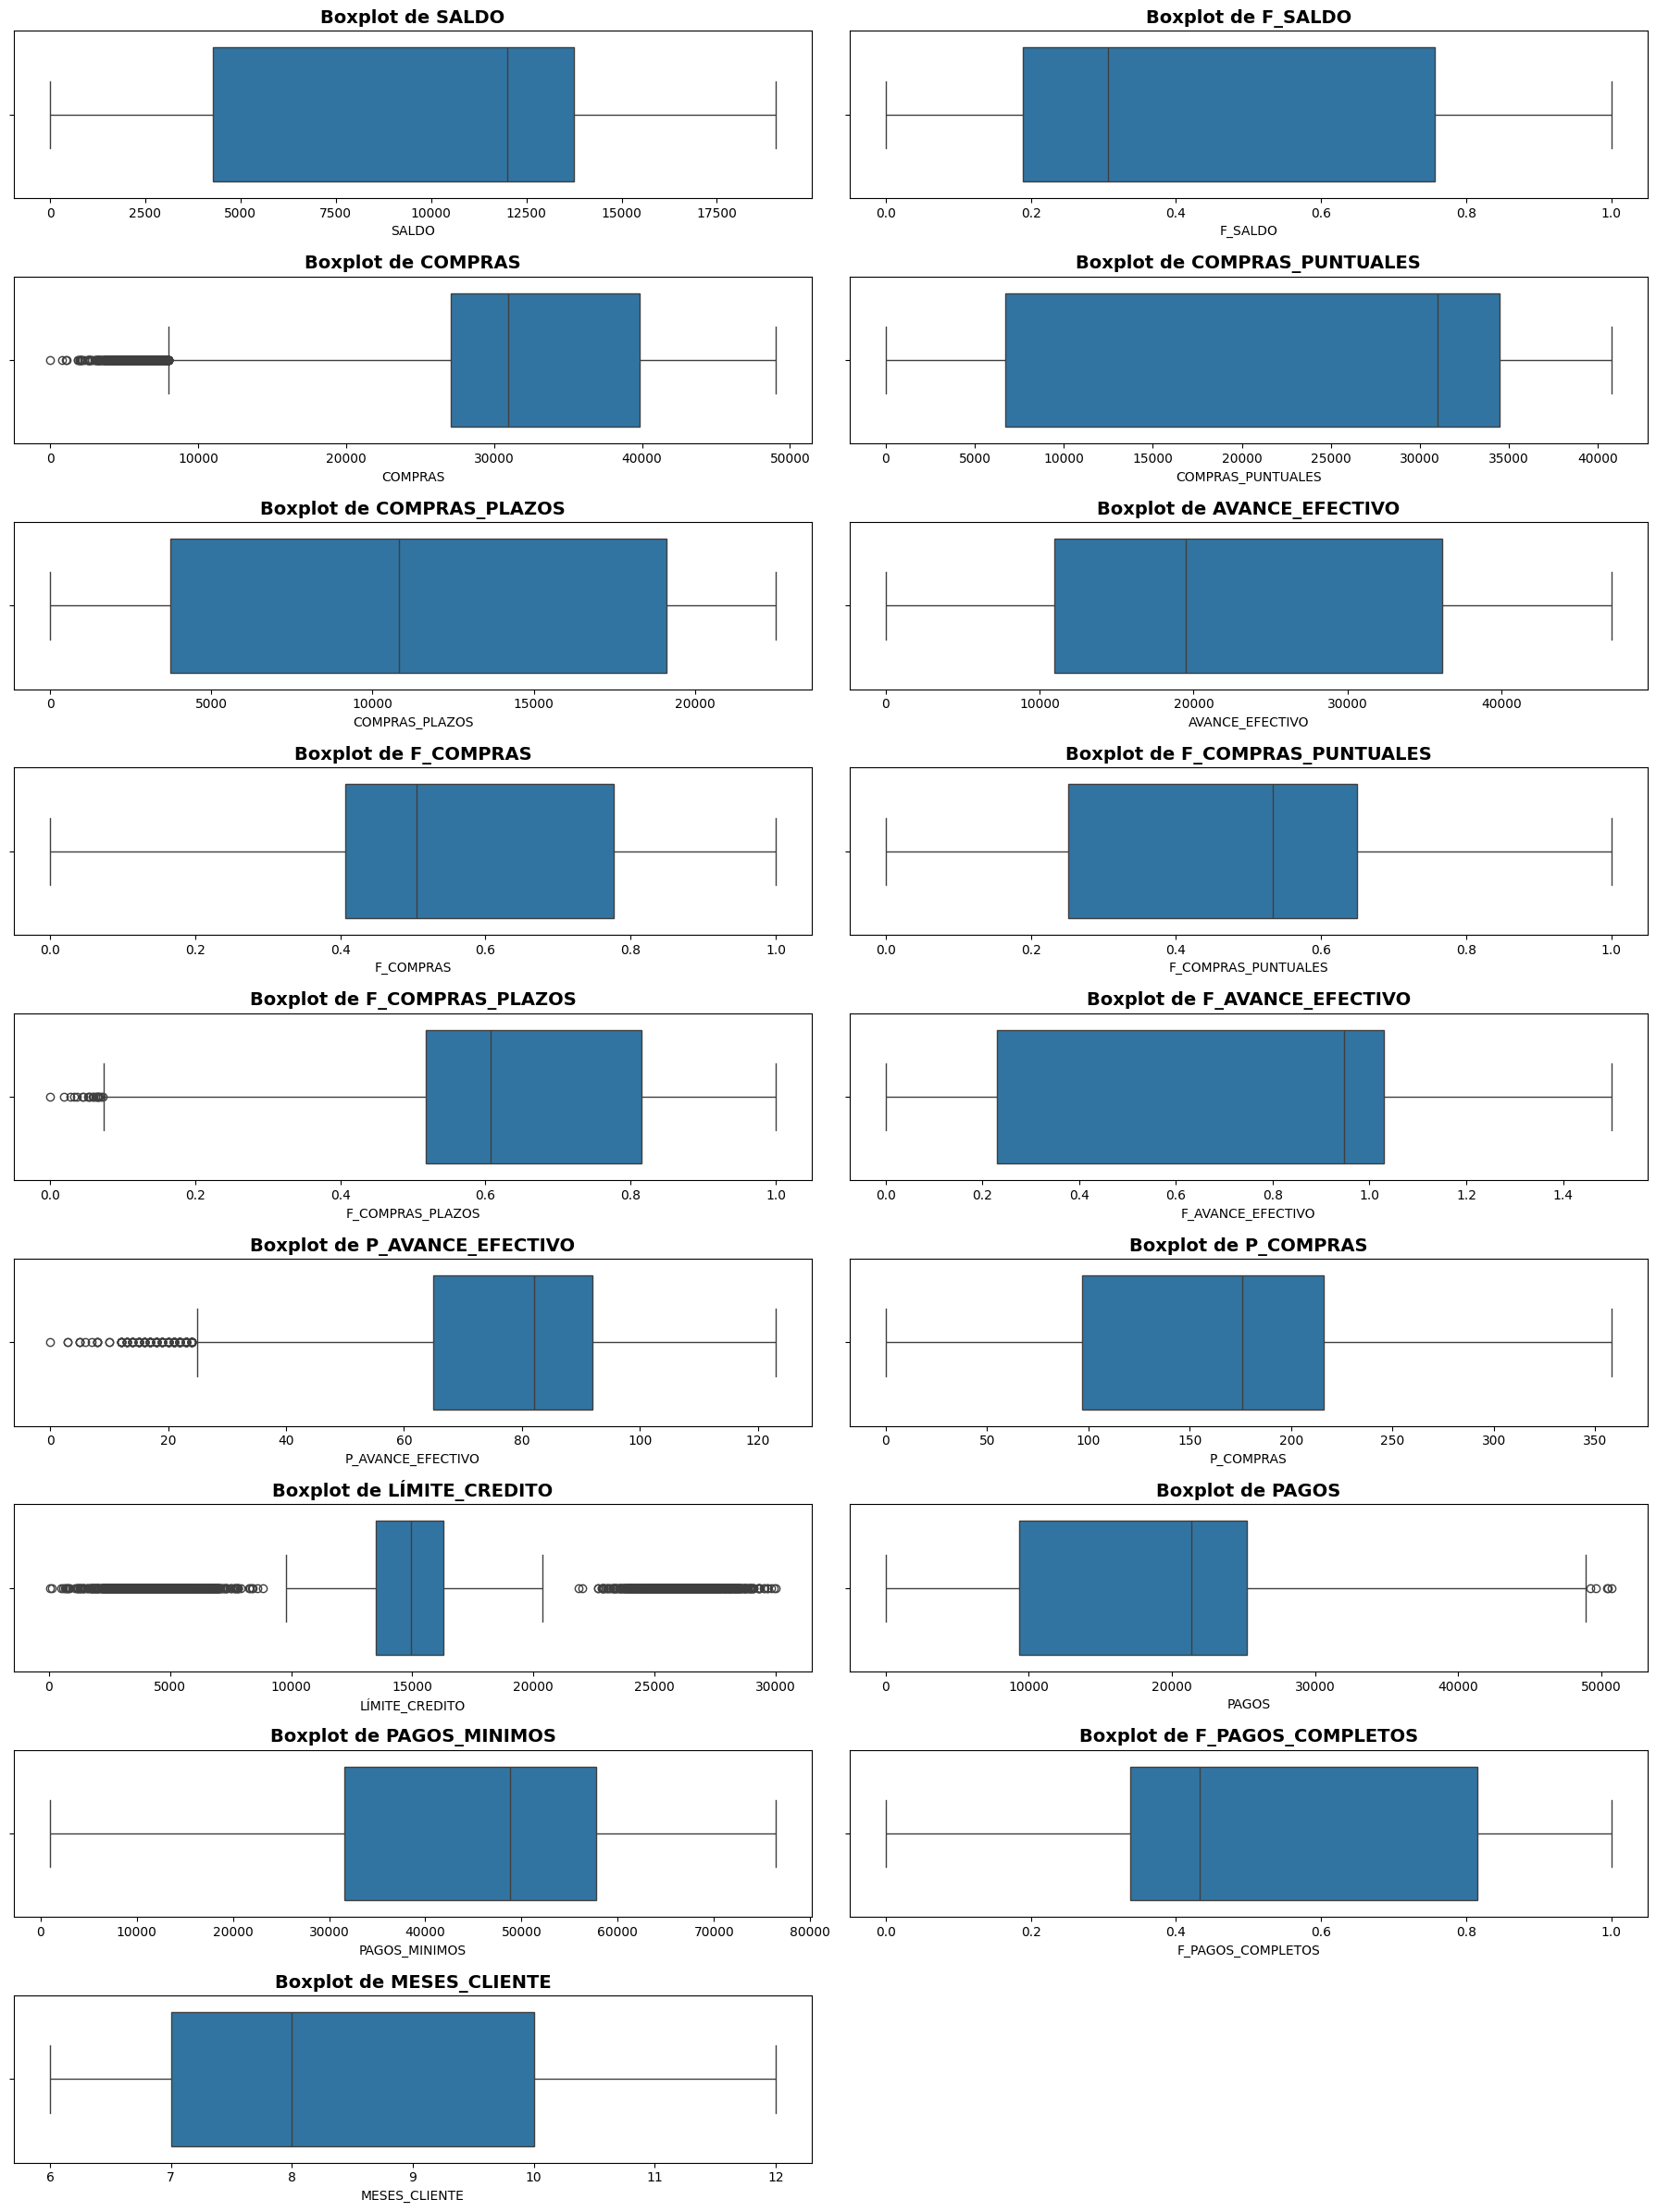

In [8]:
plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(9, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Segun los boxplots, se evidencia que algunas de las variables como: LIMITE_CREDITO, AVANCE_EFECTIVO y COMPRAS, presentan valores atípicos. Lo anterior puede representar que esas variables son muy dispersas o hay muchos registros con datos fuera de lo común. Por lo anterior, se fortalece la necesidad de usar un escalador (escalar los datos) debido a que varios algoritmos de agrupación (al basarse en distancias) son sensibles a la escala de los datos.

In [9]:

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada variable y crear un scatter plot
for i, var in enumerate(atributosNum):
    x = df.index  # Índices de los pacientes
    y = df[var]   # Variable actual

    axes[i].scatter(x, y, s=1)
    axes[i].set_xlabel('Cliente')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Distribución de {var}')

# Eliminar cualquier subplot vacío si hay menos variables que subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se evidencia que las variables estan fuertemente agrupadas en ciertos rangos. Por ejemplo, la distribucion de meses de clientes tiene unicamente registros de 6, 7, 8, 9, 10 y 11 meses. Lo anterior puede ser un indicio que los clientes que llevan menos de 6 meses no estan en la base de datos o que la empresa no tiene clientes que lleven mas de 11 meses. Lo anterior se debe tener en cuenta para la interpretacion de los resultados. Otra evidencia son las compras puntuales, donde hay dos grandes grupos de registros compras menores a 10.000 y compras entre 30.000 y 40.000. Esto puede ser un indicio de que la empresa tiene dos tipos de clientes, los que compran poco y los que compran mucho.

<Axes: >

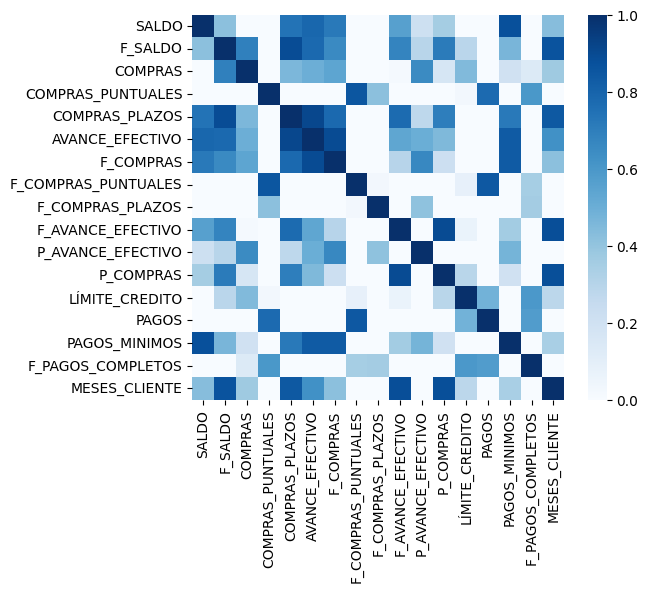

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[atributosNum].corr(), cmap="Blues", vmin=0, vmax=1)

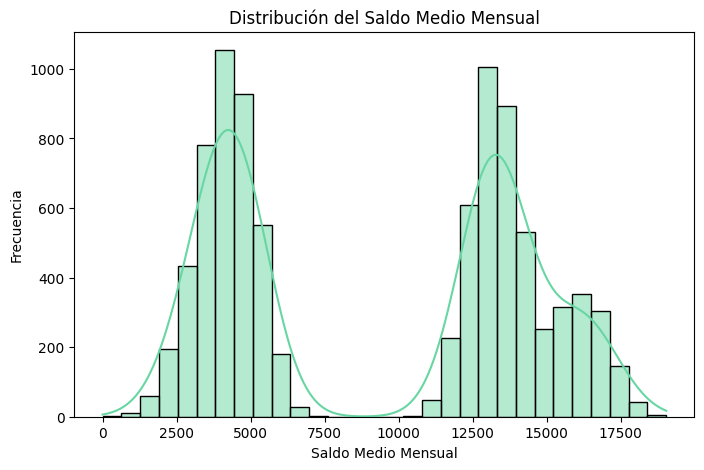

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_palette(["#68d6a3"])

# Gráfico de distribución del saldo
plt.figure(figsize=(8, 5))
sns.histplot(df["SALDO"], bins=30, kde=True, color="#68d6a3")
plt.title("Distribución del Saldo Medio Mensual")
plt.xlabel("Saldo Medio Mensual")
plt.ylabel("Frecuencia")
plt.show()


La mayoría de los clientes tienen un saldo medio mensual en dos rangos bien definidos, lo que sugiere la presencia de dos grupos distintos con diferentes patrones de saldo.

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["LÍMITE_CREDITO"], y=df["COMPRAS"], color="#68d6a3", alpha=0.6)
plt.title("Relación entre Compras Totales y Límite de Crédito")
plt.xlabel("Límite de Crédito")
plt.ylabel("Compras Totales")
plt.show()


Los clientes se agrupan en tres niveles de límite de crédito y compras totales. Esto indica que los clientes con mayor crédito suelen gastar más, pero hay variabilidad dentro de cada grupo.

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["F_COMPRAS"], bins=20, kde=True, color="#68d6a3")
plt.title("Distribución de la Frecuencia de Compras")
plt.xlabel("Frecuencia de Compras")
plt.ylabel("Cantidad de Clientes")
plt.show()


La gráfica muestra que hay dos tipos de clientes: unos que compran con poca frecuencia y otros que lo hacen muy seguido. Esto indica que hay diferencias en los hábitos de compra, lo que podría ayudar a crear estrategias para que los clientes compren más seguido.

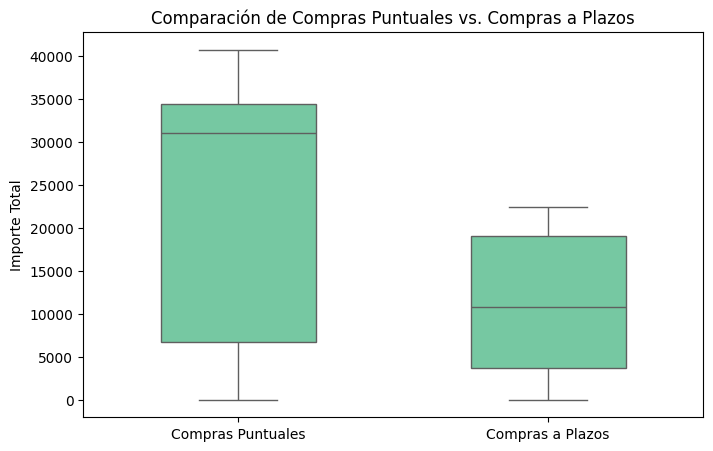

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["COMPRAS_PUNTUALES", "COMPRAS_PLAZOS"]], width=0.5, palette=["#68d6a3", "#68d6a3"])
plt.title("Comparación de Compras Puntuales vs. Compras a Plazos")
plt.ylabel("Importe Total")
plt.xticks([0, 1], ["Compras Puntuales", "Compras a Plazos"])
plt.show()


Los clientes que hacen compras puntuales gastan mucho más en total que aquellos que compran a plazos. Esto sugiere que quienes pagan de una vez suelen hacer compras más grandes, mientras que los que prefieren pagar en cuotas gastan menos en cada compra.

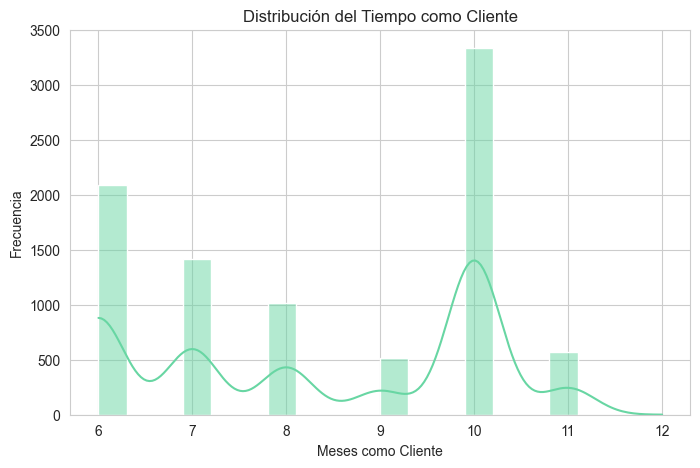

In [15]:
# Establecer estilo
sns.set_style("whitegrid")
color = "#68d6a3"

# Histograma de meses como cliente
plt.figure(figsize=(8, 5))
sns.histplot(df["MESES_CLIENTE"], bins=20, kde=True, color=color)
plt.xlabel("Meses como Cliente")
plt.ylabel("Frecuencia")
plt.title("Distribución del Tiempo como Cliente")
plt.show()

El gráfico muestra que la mayoría de los clientes han estado con el banco por 6 o 10 meses, con un pico muy marcado en los 10 meses. Esto sugiere que hay momentos específicos en los que el banco capta una gran cantidad de clientes, posiblemente debido a campañas promocionales o políticas de retención. También se observa que hay menos clientes con 9 u 11 meses, lo que podría indicar una posible deserción o baja retención en esos periodos.

C:\Users\marti\AppData\Local\Temp\ipykernel_34284\3114472334.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[["PAGOS", "PAGOS_MINIMOS"]], palette=[color])


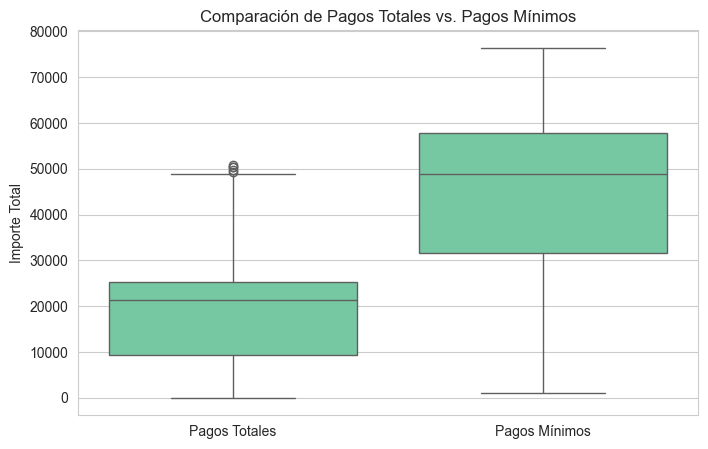

In [16]:
# Boxplot de Pagos vs. Pagos Mínimos
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["PAGOS", "PAGOS_MINIMOS"]], palette=[color])
plt.ylabel("Importe Total")
plt.title("Comparación de Pagos Totales vs. Pagos Mínimos")
plt.xticks(ticks=[0, 1], labels=["Pagos Totales", "Pagos Mínimos"])
plt.show()

Se observa que los pagos mínimos tienen una mayor variabilidad y un rango más amplio, lo que indica que algunos clientes pagan montos muy altos en esta categoría. En contraste, los pagos totales son más consistentes, con un límite superior más bajo y varios valores atípicos.

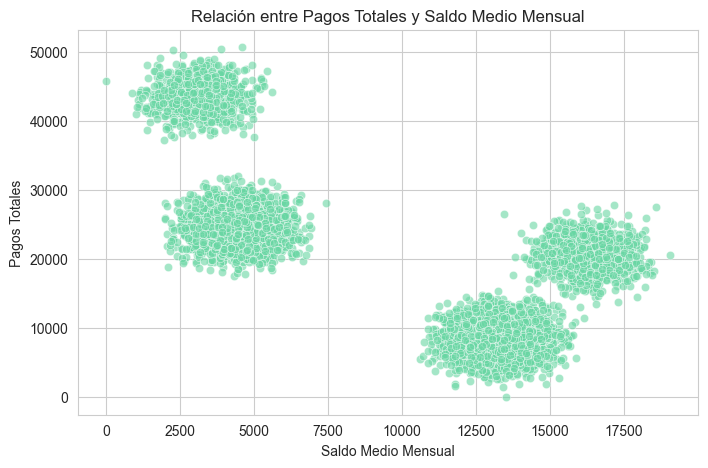

In [17]:
# Gráfico de dispersión de Pagos Totales vs. Saldo Medio Mensual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["SALDO"], y=df["PAGOS"], color=color, alpha=0.6)
plt.xlabel("Saldo Medio Mensual")
plt.ylabel("Pagos Totales")
plt.title("Relación entre Pagos Totales y Saldo Medio Mensual")
plt.show()

Se observan tres grupos bien definidos, lo que indica que los clientes tienden a agruparse en ciertos niveles de saldo y pago. Esto sugiere que existen diferentes perfiles de clientes: algunos con saldos y pagos bajos, otros con valores medios y un grupo con valores altos. 

### 1.1.2 Atributos categoricos

De acuerdo con el diccionario NO hay atributos categóricos, ya que todos los elementos indicados en el diccionario son numericos (algunos continuos otros enteros)

In [18]:
atributosCat = []

## 1.2 Análisis de calidad de datos

### 1.2.1 Análisis de completitud

In [19]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values,
    "Numero de registros duplicados": porcentajeIncompletitudAtributo.values * df.shape[0] / 100
})

Atributo  Completitud (%)  Incompletitud (%)  \
0         PAGOS_MINIMOS        96.502793           3.497207   
1        LÍMITE_CREDITO        99.988827           0.011173   
2                    ID       100.000000           0.000000   
3                 SALDO       100.000000           0.000000   
4     F_PAGOS_COMPLETOS       100.000000           0.000000   
5                 PAGOS       100.000000           0.000000   
6             P_COMPRAS       100.000000           0.000000   
7     P_AVANCE_EFECTIVO       100.000000           0.000000   
8     F_AVANCE_EFECTIVO       100.000000           0.000000   
9      F_COMPRAS_PLAZOS       100.000000           0.000000   
10  F_COMPRAS_PUNTUALES       100.000000           0.000000   
11            F_COMPRAS       100.000000           0.000000   
12      AVANCE_EFECTIVO       100.000000           0.000000   
13       COMPRAS_PLAZOS       100.000000           0.000000   
14    COMPRAS_PUNTUALES       100.000000           0.000000   
15              COMPRAS       100.000000           0.000000   
16              F_SALDO       100.000000           0.000000   
17        MESES_CLIENTE       100.000000           0.000000   

    Numero de registros duplicados  
0                            313.0  
1                              1.0  
2                              0.0  
3                              0.0  
4                              0.0  
5                              0.0  
6                              0.0  
7                              0.0  
8                              0.0  
9                              0.0  
10                             0.0  
11                             0.0  
12                             0.0  
13                             0.0  
14                             0.0  
15                             0.0  
16                             0.0  
17                             0.0

Se evidencia que existen valores nulos en los datos. En específico respecto a la variable "PAGOS_MINIMOS" (con 3.5% de valores nulos) y la variable "LÍMITE_CREDITO" (con 0.01% de valores nulos). Al tratarse de muy pocos valores, se tiene varias opciones para tratarlos, como eliminar los registros que tienen estos valores nulos, reemplazarlos por un valor específico dado por el negocio o insertar algun tipo de valor estadístico como la media o la mediana. 

Las demás variables no presentan valores nulos.

### 1.2.2 Análisis de Unicidad

A continuación, se presenta el análisis de unicidad de los datos, es decir, se busca identificar si existen registros duplicados en el conjunto de datos.

In [20]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")


Se cuenta con 0 registros duplicados (0.00%)


Se observa que no existen registros duplicados en el conjunto de datos.

### 1.2.3 Análisis de Validez

In [21]:
categorical_expected = {
}

In [22]:
# Verificación de variables categóricas esperadas
for col, expected_values in categorical_expected.items():
    invalid_values = df[~df[col].isin(expected_values)][col].unique()
    if len(invalid_values) > 0:
        print(f"\nValores no esperados en {col}: {invalid_values}")
    else:
        print(f"\nTodos los valores en {col} son válidos")

In [23]:
# Variables con un mínimo específico (en general es que las variables sean positivas)
numeric_minimums = {
    "F_SALDO": 0,
    "F_COMPRAS": 0,
    "F_COMPRAS_PUNTUALES": 0,
    "F_COMPRAS_PLAZOS": 0,
    "F_AVANCE_EFECTIVO": 0,
    "F_PAGOS_COMPLETOS": 0, # Un porcentaje debe ir de 0 a 1
    "MESES_CLIENTE": 0 # Un mes no puede ser negativo (meses de pertenencia del cliente)

}

# Variables con un máximo específico (no se tiene un maximo)
numeric_maximums = {
    "F_SALDO": 1,
    "F_COMPRAS": 1,
    "F_COMPRAS_PUNTUALES": 1,
    "F_COMPRAS_PLAZOS": 1,
    "F_AVANCE_EFECTIVO": 1,
    "F_PAGOS_COMPLETOS": 1
}

# Verificar mínimos
for col, min_val in numeric_minimums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nValores menores a {min_val} en {col}:")
        print(out_of_range.describe())

# Verificar máximos
for col, max_val in numeric_maximums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nValores mayores a {max_val} en {col}:")
        print(out_of_range.describe())



Valores mayores a 1 en F_AVANCE_EFECTIVO:
count    3040.000000
mean        1.130566
std         0.131954
min         1.000002
25%         1.027292
50%         1.065099
75%         1.258586
max         1.500000
Name: F_AVANCE_EFECTIVO, dtype: float64


In [24]:
print("Porcentaje de registros fuera del rango", 3040.000000/df.shape[0] * 100)

Porcentaje de registros fuera del rango 33.96648044692737


Al analizar las variables numéricas, se verificó que aquellas con un rango definido de valores no presentaran datos fuera de dicho intervalo. Según el diccionario de datos, las variables con un rango determinado son: "F_SALDO", "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS", "F_AVANCE_EFECTIVO" y "F_PAGOS_COMPLETOS". Esta última, aunque el diccionario no lo indica explícitamente, se asume que debe estar entre 0 y 1, ya que representa un porcentaje.

Durante el análisis, se identificó que la variable "F_AVANCE_EFECTIVO" contenía 3,040 registros con valores fuera del rango permitido, lo que representa aproximadamente el 33.96% de los datos. Ante esta situación, se consultó con el experto sobre cómo proceder con estos valores. El experto recomendó imputar los datos mayores a 1, reemplazándolos por 1, dado que este valor representa una alta frecuencia.

### 1.2.4 Análisis de Consistencia

El entendimiento previo de los datos permitió ver que la variable que presenta errores de consistencia es "F_AVANCE_EFECTIVO". Lo anterior, debido a que se encontraron valores fuera del rango permitido. Por lo tanto, luego de preguntarle al experto se debe reemplazar los valores mayores a 1 por 1.

### 1.3 Posibles variables a descartar

1. **ID**: Se descarta ya que no aporta información relevante para el análisis, debido a que es un identificador único de cada cliente, y al querer reconocer patrones o segmentos de estos, no aportan información relevante.


# 2. Preparación de datos

In [25]:
df_modified = df.copy()

### 2.1 Tratamiento de problemas de completitud

Debido a que los valores nulos en las variables "PAGOS_MINIMOS" y "LÍMITE_CREDITO" son muy pocos, se decide eliminarlos del conjunto de datos.

In [26]:
df_modified = df_modified.dropna()
df_modified.shape

(8636, 18)

### 2.3 Eliminacion columna ID

In [27]:
df_modified = df_modified.drop(columns=['ID'])
df_modified.head()

SALDO   F_SALDO      COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0   5323.148883  0.250693  26344.07220       38237.442520     3727.113162   
1  12726.638120  0.791307  37958.51902        5690.742440    18733.810960   
3   4740.988511  0.178076  27399.00384       38246.863490     3402.853375   
4  13820.920640  0.826914  42214.02163        7341.007821    19273.070990   
5  12439.064890  0.706673  40674.22612        6156.208831    19401.475610   

   AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0     15708.239680   0.496536             0.464442          0.821611   
1     38284.354430   0.699457             0.250327          0.654863   
3      6936.812518   0.439666             0.606597          0.783129   
4     40091.347850   0.821412             0.283579          0.501361   
5     32438.912700   0.836764             0.343936          0.527813   

   F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO  \
0           0.194502                100         77     16819.48004   
1           1.083902                 78        156     15617.57058   
3           0.228299                 78         83     12926.58797   
4           1.106350                 88        182     14404.70507   
5           0.970693                103        216     14554.91155   

          PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  MESES_CLIENTE  
0  21337.027460    39452.95812           0.817907              7  
1   8000.183624    63013.74848           0.343119              9  
3  23919.113400    38444.21998           0.883984              7  
4   6994.688474    62041.61734           0.383186             10  
5   8814.239865    58227.56469           0.398377             10

### 2.4 Correcion datos mayores a 1 en la variable F_AVANCE_EFECTIVO

De acuerdo a la comunicacion con el Experto se hace el reemplazo de los valores superiores a 1 en la columna "F_AVANCE_EFECTIVO" por 1. 

In [28]:
df_modified.loc[df["F_AVANCE_EFECTIVO"] > 1, "F_AVANCE_EFECTIVO"] = 1
df_modified.head()

SALDO   F_SALDO      COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0   5323.148883  0.250693  26344.07220       38237.442520     3727.113162   
1  12726.638120  0.791307  37958.51902        5690.742440    18733.810960   
3   4740.988511  0.178076  27399.00384       38246.863490     3402.853375   
4  13820.920640  0.826914  42214.02163        7341.007821    19273.070990   
5  12439.064890  0.706673  40674.22612        6156.208831    19401.475610   

   AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0     15708.239680   0.496536             0.464442          0.821611   
1     38284.354430   0.699457             0.250327          0.654863   
3      6936.812518   0.439666             0.606597          0.783129   
4     40091.347850   0.821412             0.283579          0.501361   
5     32438.912700   0.836764             0.343936          0.527813   

   F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO  \
0           0.194502                100         77     16819.48004   
1           1.000000                 78        156     15617.57058   
3           0.228299                 78         83     12926.58797   
4           1.000000                 88        182     14404.70507   
5           0.970693                103        216     14554.91155   

          PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  MESES_CLIENTE  
0  21337.027460    39452.95812           0.817907              7  
1   8000.183624    63013.74848           0.343119              9  
3  23919.113400    38444.21998           0.883984              7  
4   6994.688474    62041.61734           0.383186             10  
5   8814.239865    58227.56469           0.398377             10

In [29]:
df_modified['F_AVANCE_EFECTIVO'].describe()

count    8636.000000
mean        0.690454
std         0.376051
min         0.000000
25%         0.230676
50%         0.947896
75%         1.000000
max         1.000000
Name: F_AVANCE_EFECTIVO, dtype: float64

### 2.3 Procesamiento del conjunto

Debido a que algunos de los algoritmos son sensibles a los datos atípicos, se utiliza un objeto de la clase StandardScaler() para realizar la estandarización

In [30]:
standard_scaler = StandardScaler()

Adicionalmente, estos algoritmos requieren que los datos sean numéricos, por lo que se utiliza One-Hot-Encoding para convertir la variable categórica "MESES_CLIENTE" en variables numéricas.

In [31]:
df_encoded = pd.get_dummies(df_modified, columns=atributosCat, drop_first=True)
df_encoded.head()

SALDO   F_SALDO      COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0   5323.148883  0.250693  26344.07220       38237.442520     3727.113162   
1  12726.638120  0.791307  37958.51902        5690.742440    18733.810960   
3   4740.988511  0.178076  27399.00384       38246.863490     3402.853375   
4  13820.920640  0.826914  42214.02163        7341.007821    19273.070990   
5  12439.064890  0.706673  40674.22612        6156.208831    19401.475610   

   AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0     15708.239680   0.496536             0.464442          0.821611   
1     38284.354430   0.699457             0.250327          0.654863   
3      6936.812518   0.439666             0.606597          0.783129   
4     40091.347850   0.821412             0.283579          0.501361   
5     32438.912700   0.836764             0.343936          0.527813   

   F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO  \
0           0.194502                100         77     16819.48004   
1           1.000000                 78        156     15617.57058   
3           0.228299                 78         83     12926.58797   
4           1.000000                 88        182     14404.70507   
5           0.970693                103        216     14554.91155   

          PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  MESES_CLIENTE  
0  21337.027460    39452.95812           0.817907              7  
1   8000.183624    63013.74848           0.343119              9  
3  23919.113400    38444.21998           0.883984              7  
4   6994.688474    62041.61734           0.383186             10  
5   8814.239865    58227.56469           0.398377             10

Ahora si se estandariza el conjunto de datos y se convierte la variable categórica en numérica.

In [32]:
scaled = standard_scaler.fit_transform(df_encoded)
scaled

array([[-0.79300398, -0.73566243, -0.37695085, ..., -0.30847774,
         1.01830121, -0.7799086 ],
       [ 0.65299501,  1.17477969,  0.67482083, ...,  1.21474349,
        -0.75547469,  0.35934896],
       [-0.90670757, -0.99227708, -0.2814192 , ..., -0.37369335,
         1.26516211, -0.7799086 ],
       ...,
       [ 1.38301184, -0.95319322, -2.37354457, ...,  0.68125986,
        -1.55450587, -0.21027982],
       [ 1.20089644, -1.20769381, -1.65604823, ...,  0.39720718,
        -1.71064462, -0.21027982],
       [-0.68961696, -1.0320563 ,  0.17878632, ..., -0.71489881,
         1.02606877, -0.7799086 ]])

Luego construimos el df de nuevo

In [33]:
df_scaled = pd.DataFrame(scaled, columns=df_encoded.columns)
df_scaled

SALDO   F_SALDO   COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0    -0.793004 -0.735662 -0.376951           1.129052       -1.083159   
1     0.652995  1.174780  0.674821          -1.269884        1.034502   
2    -0.906708 -0.992277 -0.281419           1.129747       -1.128917   
3     0.866723  1.300610  1.060187          -1.148247        1.110599   
4     0.596828  0.875697  0.920748          -1.235576        1.128719   
...        ...       ...       ...                ...             ...   
8631 -0.642208 -0.793427 -0.309039           0.958033       -1.120314   
8632  0.644389  0.802730  0.717845          -1.299161        1.061453   
8633  1.383012 -0.953193 -2.373545           0.710196       -0.024182   
8634  1.200896 -1.207694 -1.656048           0.654267        0.139360   
8635 -0.689617 -1.032056  0.178786           0.696457       -1.210382   

      AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0           -0.545310  -0.295074            -0.063097          0.949506   
1            1.248193   0.653633            -1.029104          0.147883   
2           -1.242134  -0.560953             0.578254          0.764507   
3            1.391745   1.223805            -0.879083         -0.590062   
4            0.783817   1.295580            -0.606773         -0.462898   
...               ...        ...                  ...               ...   
8631        -0.862815  -0.419919             0.275430          0.981765   
8632         0.943175   0.704473            -0.911355         -0.375180   
8633        -0.584520  -0.631088             1.207229          0.318628   
8634        -0.692425  -0.509510             1.474001         -0.073863   
8635        -1.114699  -0.518470             0.343020          1.153153   

      F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO  \
0             -1.318921           1.071818  -1.233336        0.385173   
1              0.823196           0.082435  -0.124703        0.167695   
2             -1.229042           0.082435  -1.149136       -0.319222   
3              0.823196           0.532154   0.240164       -0.051766   
4              0.745257           1.206734   0.717297       -0.024587   
...                 ...                ...        ...             ...   
8631          -1.328152          -0.052481  -0.896536        0.530712   
8632           0.650741           0.846958   0.071764       -0.408387   
8633           0.823196          -1.131808  -0.194869       -2.059724   
8634           0.823196          -0.682089   0.184031       -1.545726   
8635          -1.296471           0.487182  -1.036869        0.450253   

         PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  MESES_CLIENTE  
0     0.137188      -0.308478           1.018301      -0.779909  
1    -1.068201       1.214743          -0.755475       0.359349  
2     0.370558      -0.373693           1.265162      -0.779909  
3    -1.159078       1.151895          -0.605787       0.928978  
4    -0.994626       0.905313          -0.549034       0.928978  
...        ...            ...                ...            ...  
8631  0.373747      -0.606590           1.201172      -0.779909  
8632 -1.124649       1.454767          -0.891907       0.928978  
8633  0.282766       0.681260          -1.554506      -0.210280  
8634  0.140123       0.397207          -1.710645      -0.210280  
8635  0.441489      -0.714899           1.026069      -0.779909  

[8636 rows x 17 columns]

# 3. Modelos

## 3.1 K-means

* Natalia Villegas Calderon - 202113370

El algoritmo K-Means es un método de agrupamiento no supervisado que permite dividir un conjunto de datos en k grupos homogéneos basados en similitudes entre las observaciones. Funciona asignando cada punto de datos al cluster más cercano a su centroide y ajustando iterativamente la posición de estos centroides hasta lograr una segmentación óptima. En este caso, K-Means es ideal para clasificar clientes bancarios según su comportamiento financiero, ya que permite identificar patrones en el uso del crédito, hábitos de pago y tipo de compras. Su eficiencia, facilidad de implementación e interpretación clara lo convierten en una herramienta poderosa para la segmentación de clientes.

### 3.1.1 Selección de hiperparámetros

Para implementar el algoritmo de K-Means, es fundamental definir el número de Clusters (k) que se utilizarán para agrupar los datos. Para ello, se utilizarán dos pruebas para la selección de este valor: el método del codo y el método de la silueta:

#### 3.1.1.1 Método del codo

Este método utiliza la inercia, o la suma de los cuadrados de las distancias de todos los puntos al centroide más cercano. Se utiliza la funcion elbow_plot() para graficar la inercia en función del número de clusters, y se selecciona el valor de k en el punto de inflexión de la curva.

In [34]:
def elbow_plot(X, model, k_min=2, k_max=10):
    """
    Genera la gráfica para el método del codo usando KMeans
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el valor de inercia
        inertias.append(model_k.inertia_)

    # Titulo
    if model == "kmeans":
        plt.title('Método del codo para KMeans')
    else:
        plt.title('Método del codo para KMedoids')
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

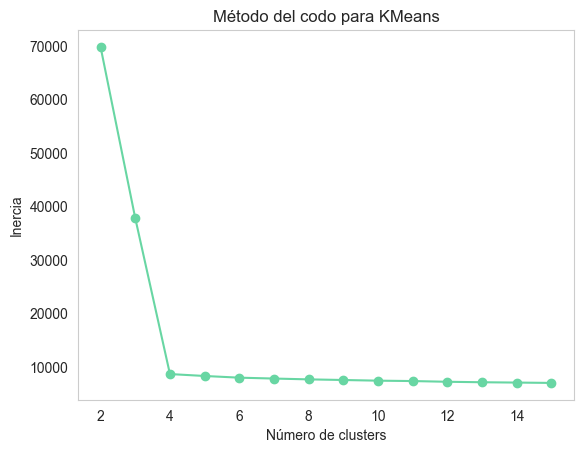

In [35]:
elbow_plot(df_scaled, "kmeans", 2, 15)

El mejor valor de _k_ se determina con el punto después del cual la inercia empieza a tener un comportamiento aproximadamente lineal, es decir, cuando el aumento del número de grupos no representa una disminución considerable de la inercia. Por lo anterior, de acuerdo a la gráfica se tiene un "codo" en k=4, valor en el cual se presenta un cambio en el comportamiento de la inercia. Sin embargo, para complementar se empleará el método de la silueta.

#### 3.1.1.2 Método de la silueta

El método de la silueta es una técnica que evalúa la calidad de los clusters generados en algoritmos de agrupamiento. En particular, el coeficiente de la silueta mide qué tan bien separado está cada punto dentro de su cluster en comparación con los clusters vecinos. Su valor oscila entre -1 y 1, donde valores cercanos a 1 indican que los puntos están bien agrupados y alejados de otros clusters, mientras que valores próximos a -1 sugieren que un punto podría estar mejor ubicado en otro cluster.

Para lo anterior se construye la funcion silhouette_plot() que grafica el coeficiente de la silueta en función del número de clusters, y se selecciona el valor de k que maximiza el coeficiente de la silueta.

In [36]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)

    # Titulo
    if model == "kmeans":
        plt.title('Coeficiente de la silueta para KMeans')
    else:
        plt.title('Coeficiente de la silueta para KMedoids')

    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

Para los datos se tiene

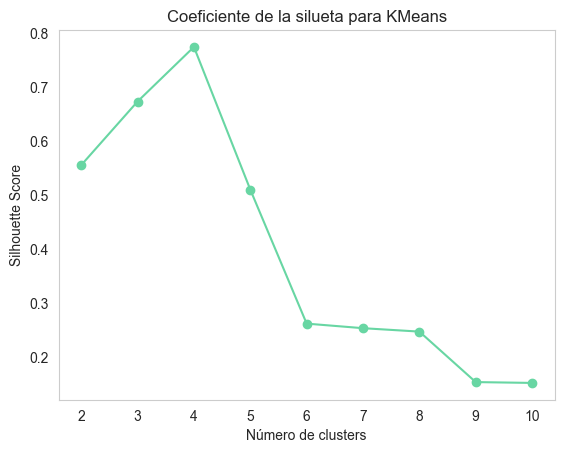

In [37]:
silhouette_plot(df_scaled, "kmeans", 2, 10)

El valor más alto del coeficiente de silueta se alcanza en k = 4, lo que indica que esta cantidad de clusters ofrece la mejor estructura de agrupación en términos de cohesión y separación. Aunque k = 3 también presenta un valor alto, el incremento en k = 4 sugiere una mejor segmentación sin aumentar demasiado la complejidad del modelo.

A partir de k = 5, el coeficiente de silueta disminuye significativamente, lo que indica que los clusters comienzan a perder cohesión interna y se solapan más. La tendencia decreciente continúa conforme el número de clusters aumenta, siendo más evidente en k ≥ 6, donde la calidad de la segmentación se ve notablemente reducida. En particular, para k = 10, el coeficiente de silueta es el más bajo, lo que indica que los clusters están menos definidos y la segmentación pierde eficacia.

Dado que k = 4 ofrece un equilibrio entre cohesión, separación e interpretabilidad, se considera la mejor opción. Para complementar este análisis, se utilizará la visualización del análisis de silueta de forma gráfica.

In [38]:
def silhouette_analysis(X, model, k_min, k_max):
    """
    Genera gráficas con el coeficiente de la silueta para cada cluster y cada ejemplo
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    for n_clusters in range(k_min, k_max+1):
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        else:
            clusterer = KMedoids(n_clusters=n_clusters, random_state=0)
        
        # Entrenamos el modelo
        cluster_labels = clusterer.fit_predict(X)
        # Obtenemos el coeficiente promedio
        silhouette_avg = silhouette_score(X, cluster_labels)
        # Obtenemos el coeficiente para cada ejemplo
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Inicializamos una figura
        fig = plt.figure(figsize = (18, 7))
        plt.xlim([-0.2, 1])
        plt.ylim([0, len(X) + (n_clusters + 1) * 10])
        
        y_lower = 10
        for i in range(n_clusters):
            # Obtenemos los valores del coeficiente para cada cluster
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            # Ordenamos los valores de mayor a menor
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title(f"Método de la silueta (k={n_clusters})")
        plt.xlabel("Coeficiente")
        plt.ylabel("Cluster")
        
        # Incluimos el valor promedio
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])
        plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

Se realiza el analisis específico para el mismo rango de k:

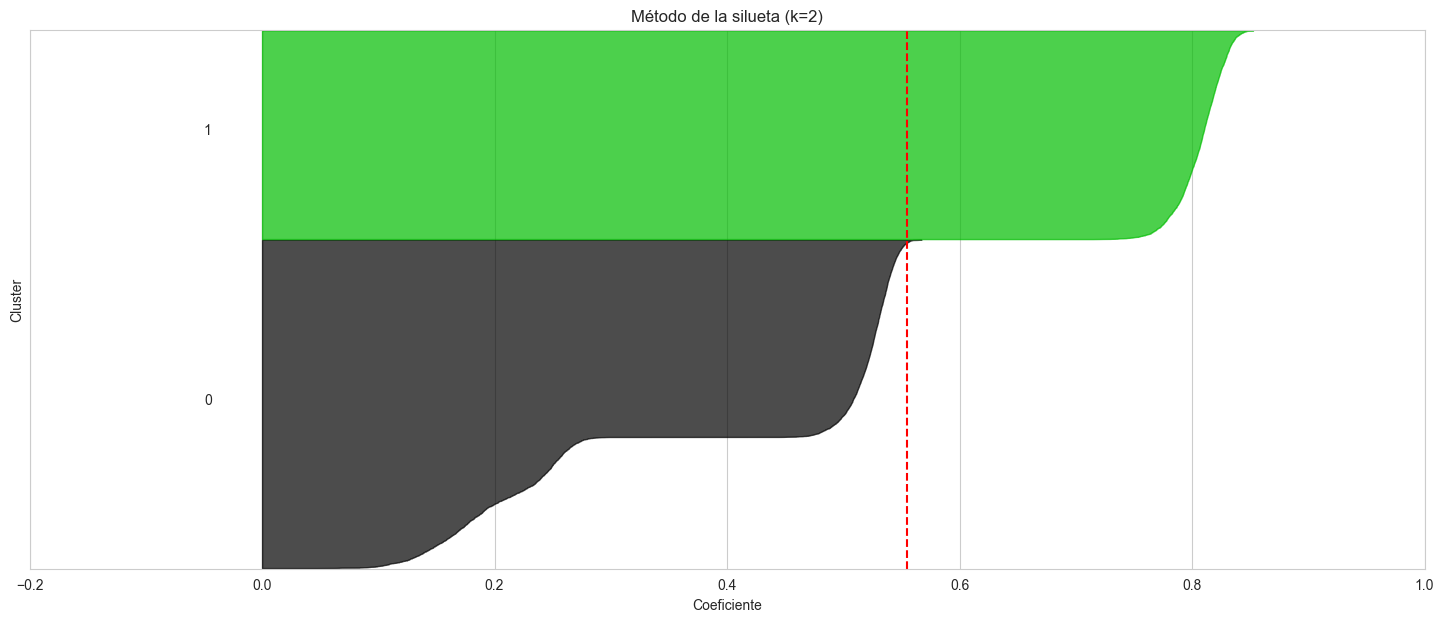

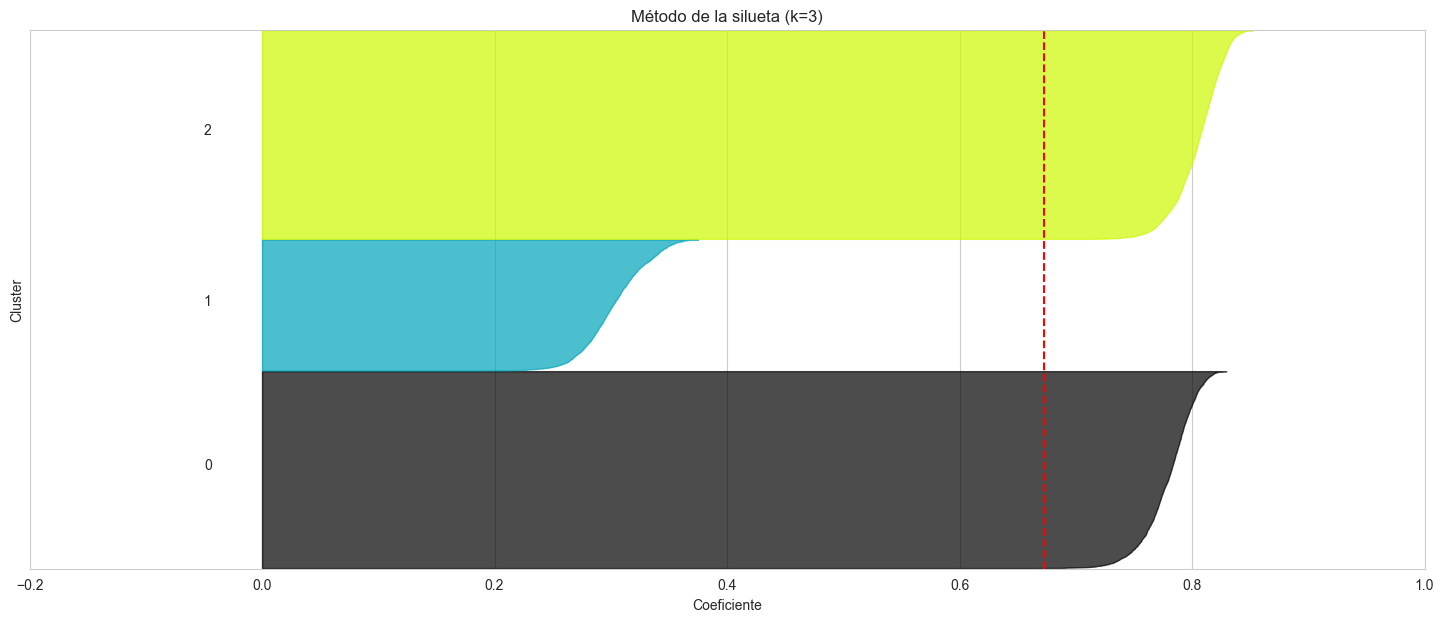

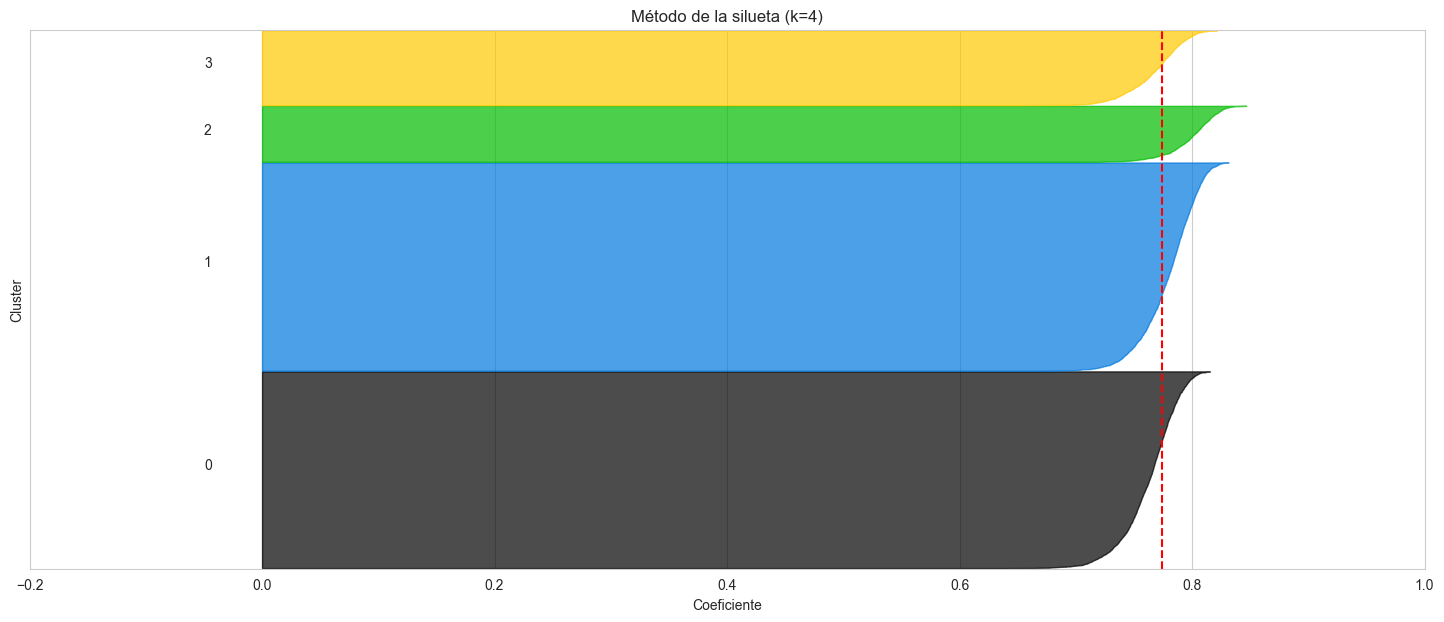

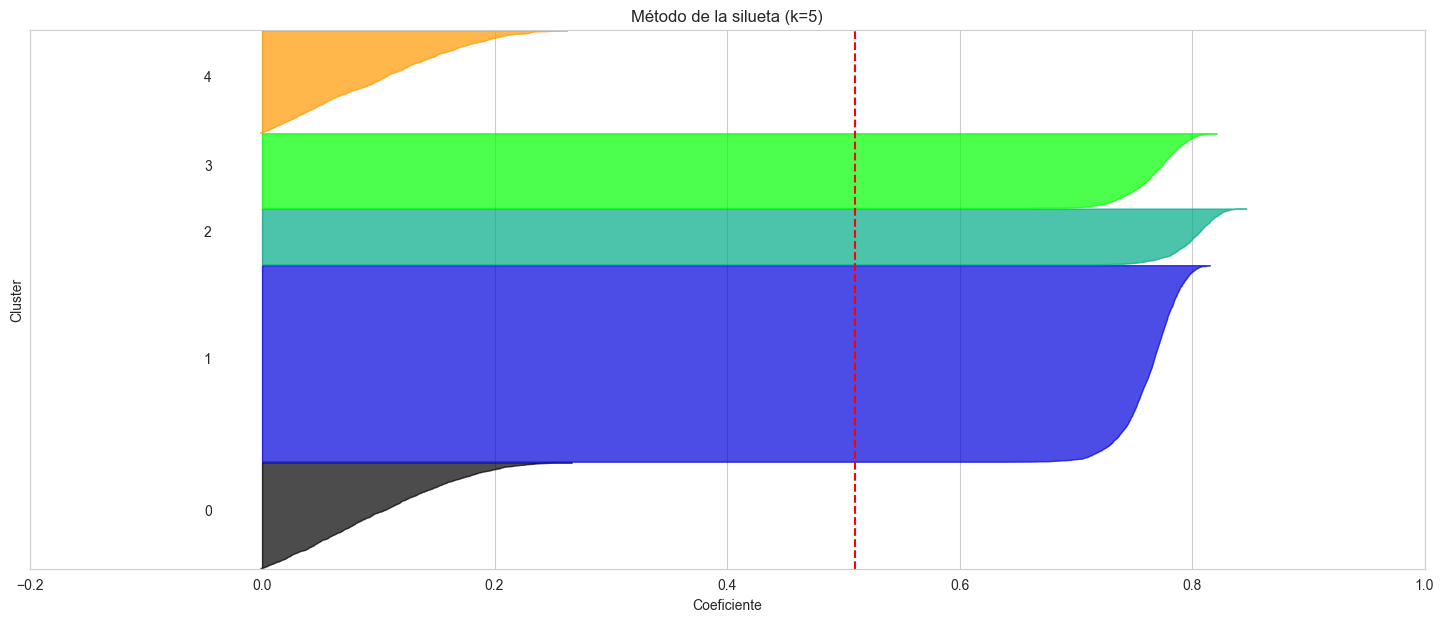

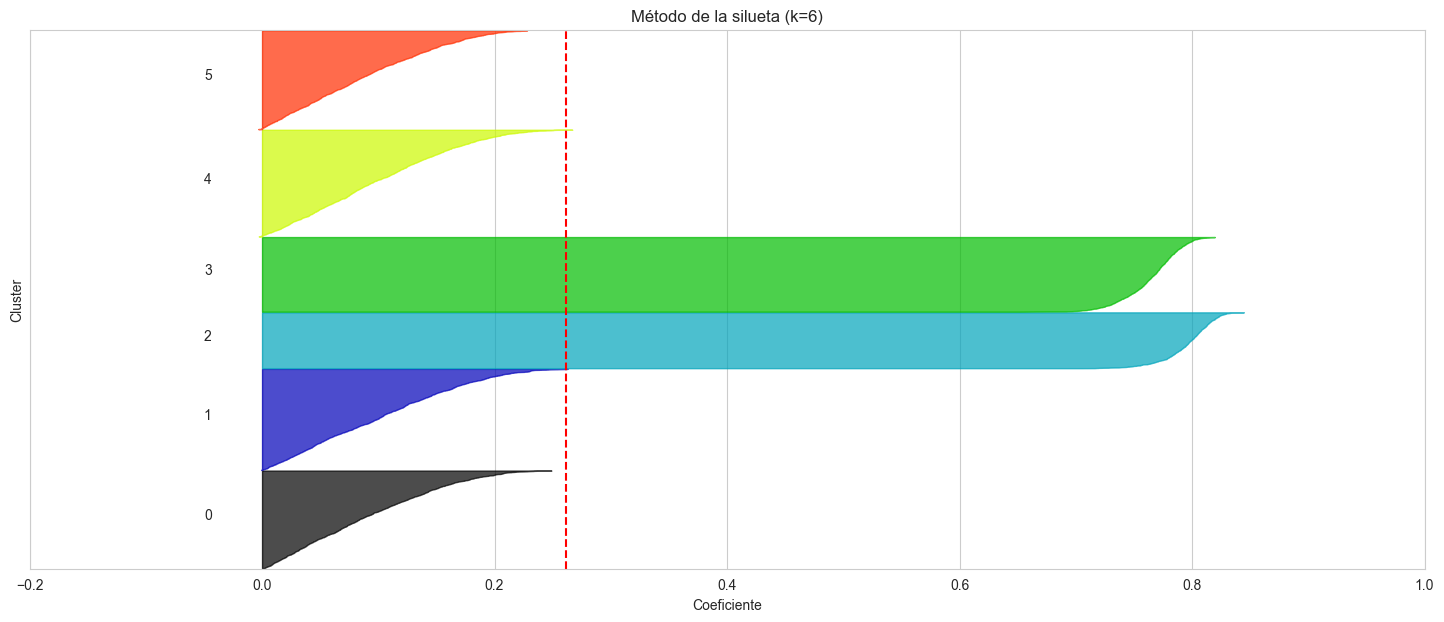

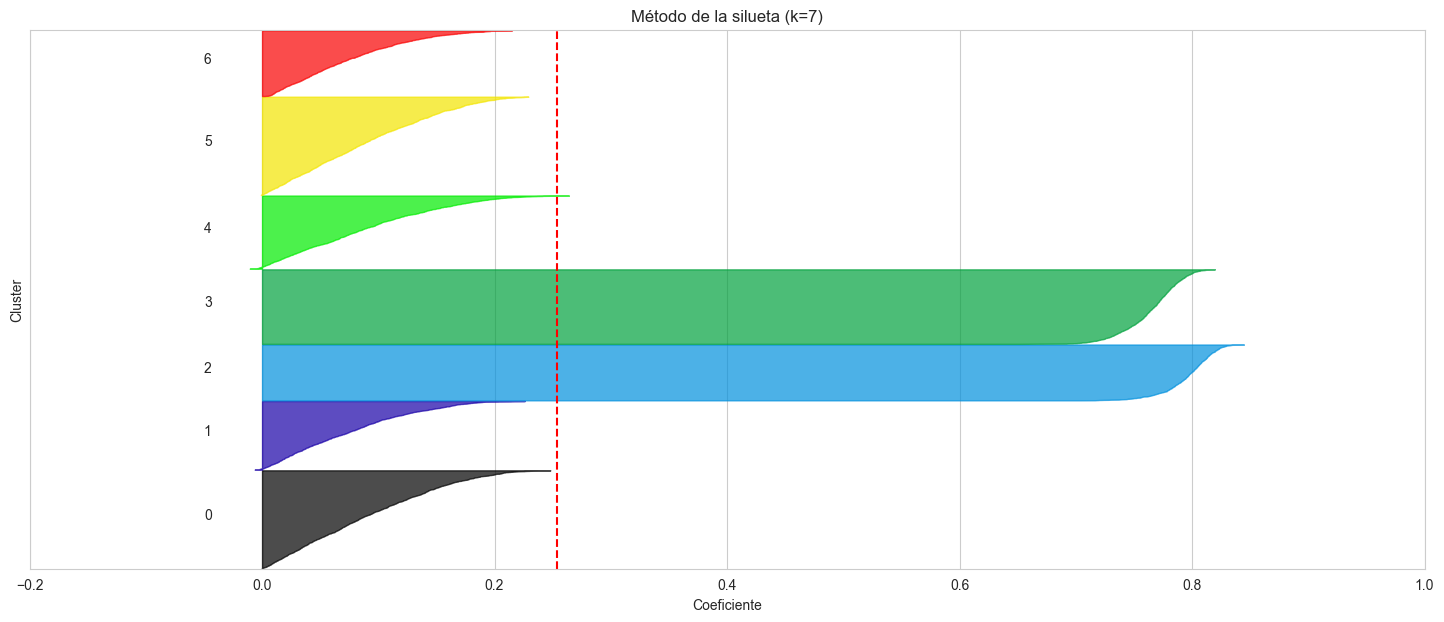

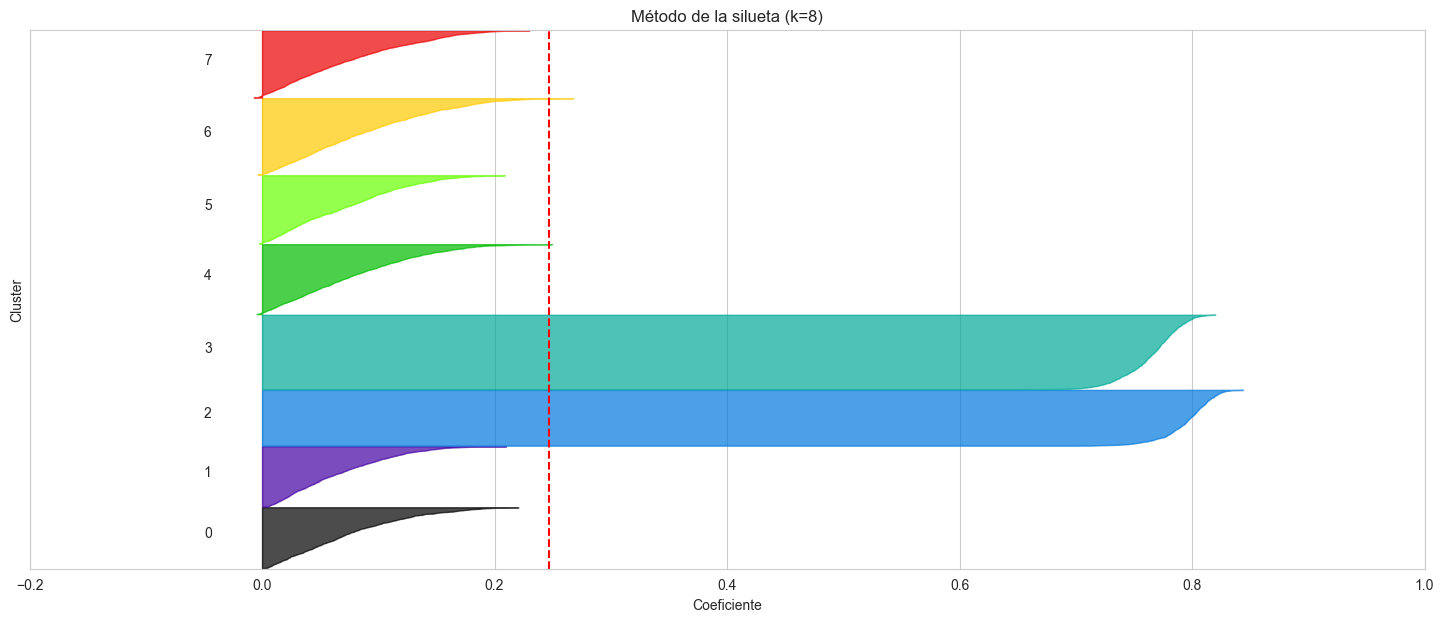

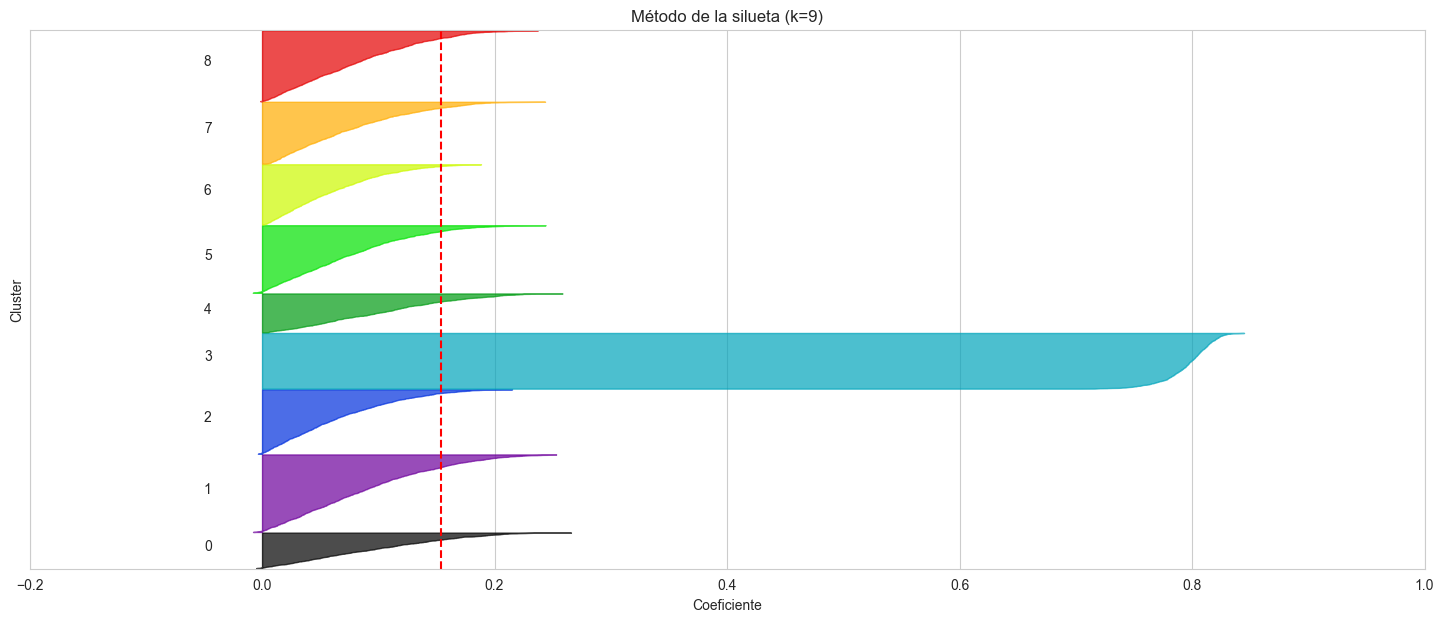

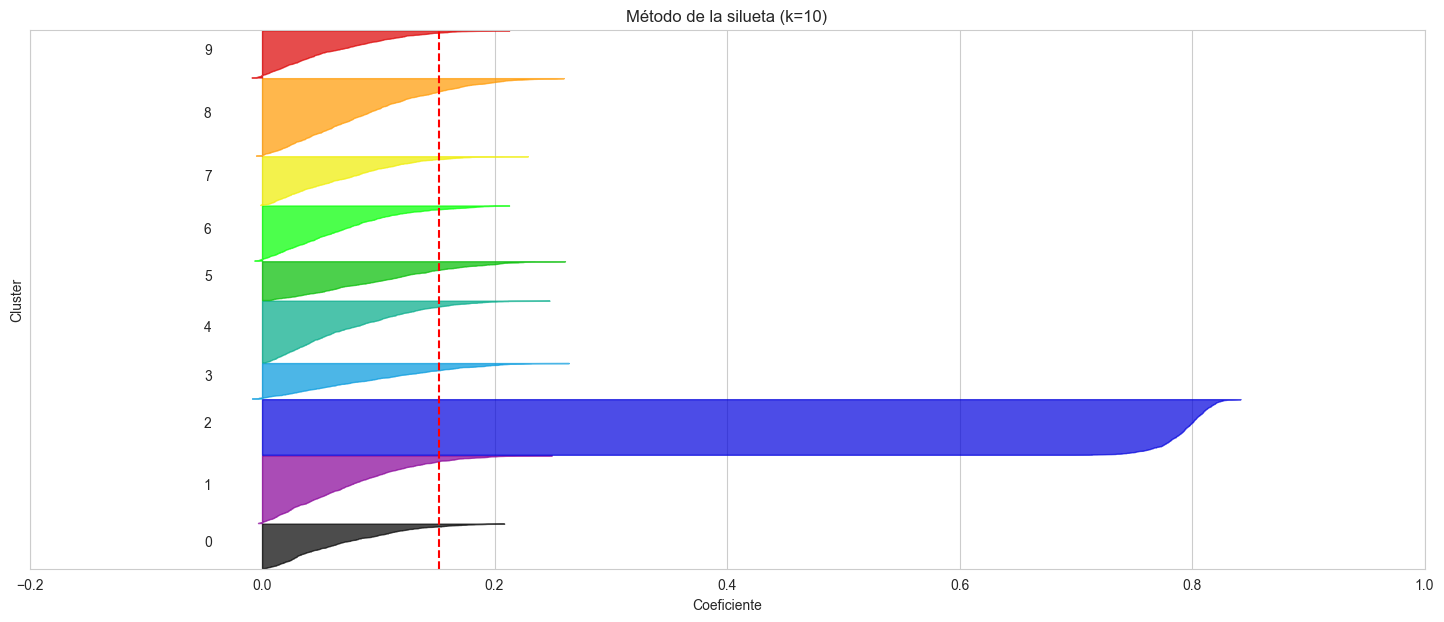

In [39]:
silhouette_analysis(df_scaled, "kmeans", 2, 10)

Para determinar el valor óptimo de k, analizamos tanto el coeficiente de silueta promedio como la distribución de los valores individuales dentro de cada cluster.

La gráfica del análisis de silueta para k = 4 muestra que esta configuración es la más adecuada, ya que presenta el mayor coeficiente de silueta y una segmentación bien definida. Donde todos los coeficientes de silueta son positivos y superiores a 0.7, lo que indica una buena cohesión dentro de los clusters y una clara separación entre ellos. Además, la línea roja, que representa el coeficiente de silueta promedio, se encuentra en un nivel alto, lo que refuerza la calidad de la agrupación. No se observan valores negativos significativos, lo que indica que los puntos están bien asignados a sus respectivos clusters, sin una superposición excesiva.

Por lo tanto, k = 4 es la mejor elección, ya que proporciona el mayor coeficiente de silueta y la segmentación más clara y efectiva.

#### 3.1.1.3 Conclusión selección de hiperparámetros

Tras analizar los diferentes métodos para determinar el número óptimo de clusters, se concluye que k = 4 es la mejor elección, basándose en los siguientes criterios:

* **Método del Codo:** La gráfica de inercia muestra un cambio significativo en k = 4, a partir del cual la reducción en la inercia comienza a estabilizarse. Esto indica que aumentar el número de clusters más allá de este punto no proporciona una mejora sustancial en la segmentación, sino que solo introduce una mayor complejidad.

* **Coeficiente de Silueta Global:** El coeficiente de silueta alcanza su valor máximo en k = 4, lo que indica que esta cantidad de clusters ofrece la mejor estructura de agrupación en términos de cohesión interna y separación entre grupos (es el pico o punto mas algo gráfico). A partir de k = 5, el coeficiente de silueta disminuye significativamente, lo que sugiere una menor calidad en la segmentación.

* **Análisis Gráfico de la Silueta:** La visualización del análisis de silueta confirma que en k = 4 los valores son mayoritariamente positivos y superiores a 0.7, lo que indica que los clusters tienen buena cohesión interna y están claramente separados. Además, la línea roja que representa el promedio del coeficiente de silueta se mantiene en un nivel alto. No se observan valores negativos significativos, lo que indica que los puntos están bien asignados a sus respectivos clusters sin una superposición excesiva.

Basado en la evaluación de estos tres enfoques, k = 4 es el valor óptimo, ya que logra un equilibrio entre una segmentación clara, una buena separación entre clusters y una interpretación eficiente sin añadir complejidad innecesaria.

**Seleccion de variables**: Se decidió trabajar con todas las variables disponibles, excepto el ID, ya que cada una aporta información clave sobre el comportamiento financiero de los clientes. Las variables incluyen importes y frecuencia de compras, avances en efectivo, pagos y límite de crédito, lo que permite capturar un panorama completo del uso del crédito y los hábitos de pago. Al incluir estos datos, se optimiza la segmentación, asegurando que los clusters reflejen diferencias reales en el manejo financiero, facilitando la identificación de patrones y el diseño de estrategias personalizadas.

### 3.1.2 Mejor modelo

Con el análisis realizado para los dos algoritmos, es posible concluir que KMeans presenta un mejor desempeño con un valor de k de 4. En ese sentido, ejecutaremos el algoritmo de KMeans:

In [40]:
km_model = KMeans(n_clusters=4, n_init="auto", random_state=0)
km_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=0)

Se calcula el coeficiente de silueta para el modelo con k=4

In [41]:
clusters = km_model.predict(df_scaled)
print(f"Coeficiente de Silueta: {silhouette_score(df_scaled, km_model.labels_)}")


Coeficiente de Silueta: 0.7738559236834935


### Grafica PCA

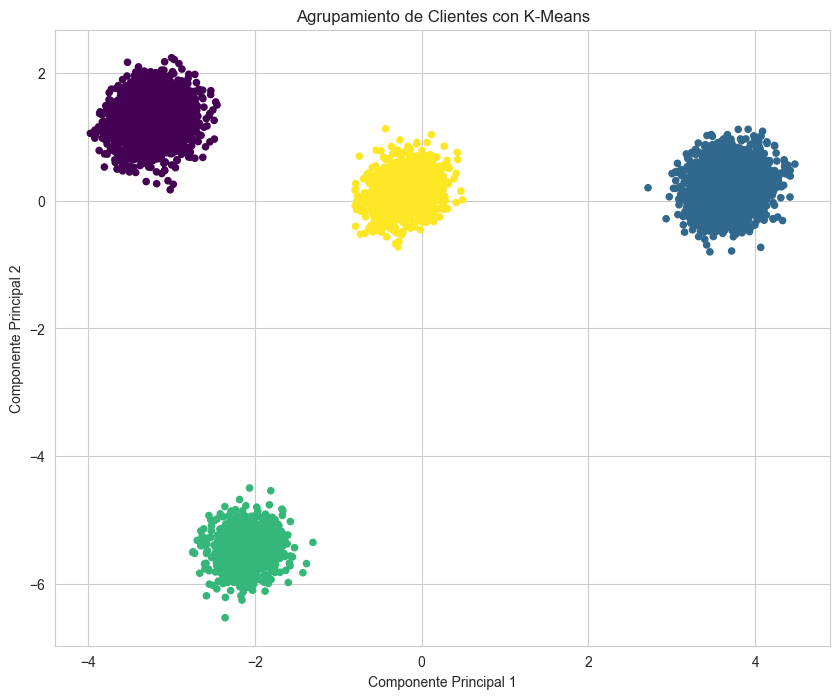

In [42]:
pca = PCA(n_components=2)
clients_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(clients_pca[:, 0], clients_pca[:, 1], c=clusters, cmap='viridis', s=20)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento de Clientes con K-Means')
plt.grid(True)
plt.show()

La visualización de PCA muestra que los cuatro clusters generados por K-Means están bien diferenciados, lo que indica una segmentación efectiva de los clientes según sus patrones de comportamiento financiero. La clara separación entre los grupos confirma que K-Means ha identificado segmentos homogéneos, lo que facilita la interpretación y aplicación de estrategias personalizadas.

A continuacion, se mira la distribución de los clusters, para ver cuantos registros quedaron en cada uno de los clusters

In [43]:
labels = km_model.labels_
indexes, values = np.unique(labels, return_counts=True)

{indexes[i]: values[i] for i in range(len(indexes))}

{0: 3171, 1: 3356, 2: 903, 3: 1206}

([<matplotlib.axis.XTick at 0x26cddd850a0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

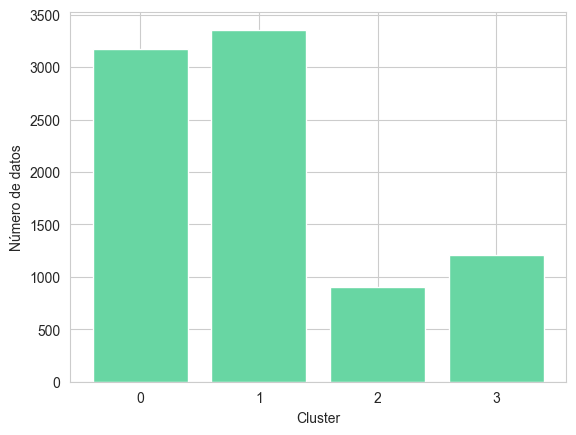

In [44]:
rects = plt.bar(indexes, values)
plt.xlabel('Cluster')
plt.ylabel('Número de datos')
plt.xticks(indexes)

La gráfica muestra la distribución de clientes en los cuatro clusters generados por K-Means. Se observa que los clusters 0 y 1 contienen la mayoría de los clientes, lo que indica que representan segmentos predominantes en la base de datos. En contraste, los clusters 2 y 3 agrupan a una menor proporción de clientes, lo que sugiere que corresponden a perfiles más específicos o con características particulares. Esta distribución permite enfocar estrategias diferenciadas, optimizando la gestión y personalización de productos según el tamaño y comportamiento de cada grupo.

## 3.2 AgglomerativeClustering

* Juan Martin Vasquez - 202113314

### 3.2.1 Selección de hiperparámetros

Para implementar el algoritmo AgglomerativeClustering, es fundamental definir el número de Clusters (k) que se utilizarán para agrupar los datos. Para ello, se utilizarán pruebas para la selección de este valor:  el método de la silueta y ademas medinate gridsearch cv se buscaran los mejores hiperparametros.

In [45]:
from itertools import product

# Definir el grid de hiperparámetros
param_grid = {
    "n_clusters": [3, 4, 5, 6,7],
    "linkage": ["ward", "complete", "average", "single"],
    "metric": ["euclidean", "l1", "l2", "manhattan", "cosine"]
}

# Lista para almacenar resultados
results = []

# Iterar sobre todas las combinaciones
for n_clusters, linkage, metric in product(param_grid["n_clusters"], param_grid["linkage"], param_grid["metric"]):
    if linkage == "ward" and metric != "euclidean":
        continue  # "ward" solo permite "euclidean"
    print(n_clusters, linkage, metric)
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
    labels = model.fit_predict(df_scaled)

    score = silhouette_score(df_scaled, labels)

    # Almacenar los resultados
    results.append({"n_clusters": n_clusters, "linkage": linkage, "metric": metric, "silhouette_score": score})

# Convertir a DataFrame y ordenar por coeficiente de silueta
df_results = pd.DataFrame(results).sort_values(by="silhouette_score", ascending=False)

# Mostrar la tabla ordenada
print(df_results)


3 ward euclidean
3 complete euclidean
3 complete l1
3 complete l2
3 complete manhattan
3 complete cosine
3 average euclidean
3 average l1
3 average l2
3 average manhattan
3 average cosine
3 single euclidean
3 single l1
3 single l2
3 single manhattan
3 single cosine
4 ward euclidean
4 complete euclidean
4 complete l1
4 complete l2
4 complete manhattan
4 complete cosine
4 average euclidean
4 average l1
4 average l2
4 average manhattan
4 average cosine
4 single euclidean
4 single l1
4 single l2
4 single manhattan
4 single cosine
5 ward euclidean
5 complete euclidean
5 complete l1
5 complete l2
5 complete manhattan
5 complete cosine
5 average euclidean
5 average l1
5 average l2
5 average manhattan
5 average cosine
5 single euclidean
5 single l1
5 single l2
5 single manhattan
5 single cosine
6 ward euclidean
6 complete euclidean
6 complete l1
6 complete l2
6 complete manhattan
6 complete cosine
6 average euclidean
6 average l1
6 average l2
6 average manhattan
6 average cosine
6 single eucli

In [46]:
df_results

n_clusters   linkage     metric  silhouette_score
19           4  complete         l2          0.773856
18           4  complete         l1          0.773856
16           4      ward  euclidean          0.773856
20           4  complete  manhattan          0.773856
21           4  complete     cosine          0.773856
..         ...       ...        ...               ...
52           6  complete  manhattan          0.223418
53           6  complete     cosine          0.221354
69           7  complete     cosine          0.211208
68           7  complete  manhattan          0.143534
66           7  complete         l1          0.143534

[80 rows x 4 columns]

In [47]:
df_results.sort_values(by="silhouette_score", ascending=False)

n_clusters   linkage     metric  silhouette_score
19           4  complete         l2          0.773856
18           4  complete         l1          0.773856
17           4  complete  euclidean          0.773856
31           4    single     cosine          0.773856
30           4    single  manhattan          0.773856
..         ...       ...        ...               ...
52           6  complete  manhattan          0.223418
53           6  complete     cosine          0.221354
69           7  complete     cosine          0.211208
68           7  complete  manhattan          0.143534
66           7  complete         l1          0.143534

[80 rows x 4 columns]

Los mejores hiperparametros para al modelo y basados en el silhouette_score son: 

n_clusters: 4

linkage: complete

metric: l2

Con un silhouette_score de: 0.773856


### 3.2.2 Mejor modelo

In [48]:
modelAC = AgglomerativeClustering(n_clusters=4, linkage="average", metric="cosine")
labelModelAC = modelAC.fit_predict(df_scaled)

In [49]:
score = silhouette_score(df_scaled, labelModelAC)
print(f"Coeficiente de Silueta: {score}")

Coeficiente de Silueta: 0.7738559236834935


#### Grafica PCA

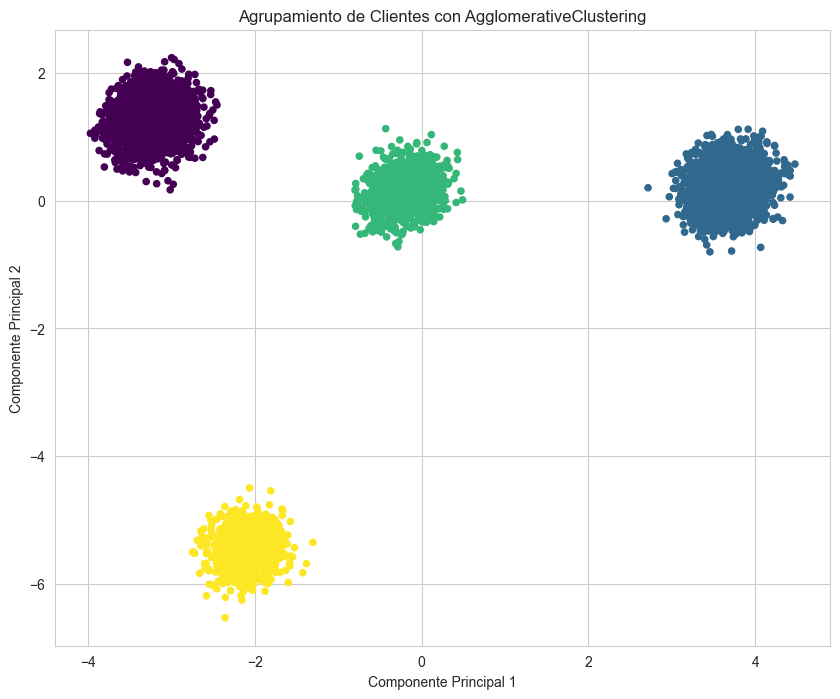

In [50]:
pca_AC = PCA(n_components=2)
clients_pca_AC = pca_AC.fit_transform(df_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(clients_pca_AC[:, 0], clients_pca_AC[:, 1], c=labelModelAC , cmap='viridis', s=20)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento de Clientes con AgglomerativeClustering')
plt.grid(True)
plt.show()

In [51]:
indexes_AC, values_AC = np.unique(labelModelAC, return_counts=True)

{indexes_AC[i]: values_AC[i] for i in range(len(indexes_AC))}

{0: 3171, 1: 3356, 2: 1206, 3: 903}

([<matplotlib.axis.XTick at 0x26ce3f2d610>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

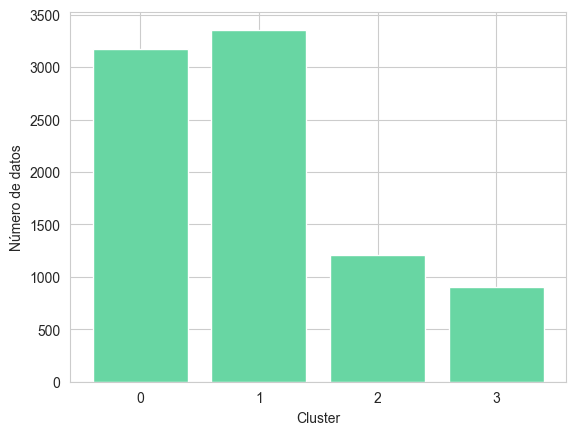

In [52]:
rects_AC = plt.bar(indexes_AC, values_AC)
plt.xlabel('Cluster')
plt.ylabel('Número de datos')
plt.xticks(indexes)

## 3.3 Modelo de Mezclas de Gaussianas (GMM) 

* Carol Sofia Florido Castro - 202111430

El Modelo de Mezclas de Gaussianas (GMM, por sus siglas en inglés) es un método de clustering probabilístico que asume que los datos provienen de una combinación de múltiples distribuciones gaussianas. A diferencia de otros algoritmos como K-Means, que asigna cada punto de datos a un único cluster, GMM proporciona una probabilidad de pertenencia a cada cluster, permitiendo capturar estructuras más complejas y solapamientos entre grupos. Este modelo es especialmente útil cuando los datos no forman clusters esféricos bien definidos, sino que presentan formas elípticas o distribuciones más flexibles. En este caso, se decidió implementar GMM debido a la naturaleza de los datos y la posibilidad de que los clusters tengan formas irregulares o solapamientos, lo que dificultaría su clasificación con métodos más rígidos como K-Means. 

In [53]:
%pip install bayesian-optimization


Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from bayes_opt import BayesianOptimization


In [55]:

X = df_scaled 

### 3.2.1 Selección de hiperparámetros

Para la selección de hiperparámetros en el modelo de Mezclas de Gaussianas (GMM), se utilizó Bayesian Optimization, un método eficiente para encontrar los valores óptimos sin necesidad de evaluar exhaustivamente todas las combinaciones posibles. Se definió la función evaluate_gmm(n_clusters), que ajusta un modelo GMM con un número específico de clusters y evalúa su desempeño mediante la métrica Silhouette Score, que mide la coherencia interna de los clusters. Luego, con la biblioteca BayesianOptimization, se exploró el número óptimo de clusters (n_components) en un rango de 2 a 10, utilizando una estrategia de exploración-explotación para mejorar progresivamente la selección de hiperparámetros. Se realizaron 5 evaluaciones iniciales aleatorias (init_points=5) seguidas de 15 iteraciones adicionales (n_iter=15), refinando la búsqueda hacia el número de clusters que maximiza la separación y cohesión de los datos.

In [56]:
def evaluate_gmm(n_clusters):
    n_clusters = int(n_clusters)  
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    labels = gmm.fit_predict(X)
    return silhouette_score(X, labels)


In [57]:
optimizer = BayesianOptimization(
    f=evaluate_gmm,
    pbounds={"n_clusters": (2, 10)},
    random_state=0,
)
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | n_clus... |
-------------------------------------
| 1         | 0.2489    | 6.391     |
| 2         | 0.2478    | 7.722     |
| 3         | 0.2489    | 6.822     |
| 4         | 0.2489    | 6.359     |
| 5         | 0.5017    | 5.389     |
| 6         | 0.7739    | 4.843     |
| 7         | 0.6555    | 3.787     |
| 8         | 0.5551    | 2.003     |
| 9         | 0.2364    | 9.999     |
| 10        | 0.7739    | 4.412     |
| 11        | 0.5551    | 2.872     |
| 12        | 0.7739    | 4.636     |
| 13        | 0.7739    | 4.194     |
| 14        | 0.7739    | 4.753     |
| 15        | 0.7739    | 4.288     |
| 16        | 0.241     | 8.858     |
| 17        | 0.7739    | 4.525     |
| 18        | 0.7739    | 4.235     |
| 19        | 0.7739    | 4.803     |
| 20        | 0.7739    | 4.352     |


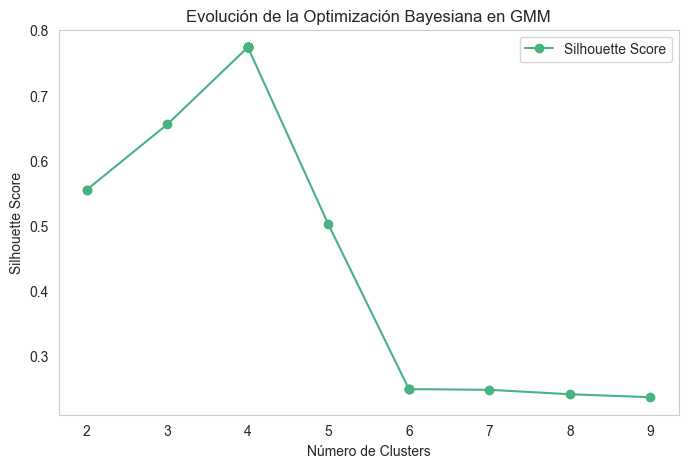

In [58]:

x = [int(res["params"]["n_clusters"]) for res in optimizer.res]
y = [res["target"] for res in optimizer.res]


x_sorted, y_sorted = zip(*sorted(zip(x, y)))


plt.figure(figsize=(8, 5))
plt.plot(x_sorted, y_sorted, marker='o', linestyle='-', color='#48b281', label='Silhouette Score')
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.title("Evolución de la Optimización Bayesiana en GMM")
plt.legend()
plt.grid()
plt.show()

La gráfica muestra la evolución del Silhouette Score en función del número de clusters durante la optimización bayesiana. Se observa que el pico máximo ocurre en 4 clusters, lo que indica que este número proporciona la mejor separación entre grupos. A partir de 5 clusters, el Silhouette Score disminuye significativamente, lo que sugiere que agregar más clusters introduce ruido y reduce la cohesión interna de cada grupo. Esto respalda la elección de 4 clusters como el número óptimo para el modelo GMM en este conjunto de datos.

In [59]:
best_n_clusters = int(optimizer.max["params"]["n_clusters"])
print(f"Mejor número de clusters: {best_n_clusters}")


Mejor número de clusters: 4


In [60]:
gmm = GaussianMixture(n_components=best_n_clusters, random_state=0)
gmm_labels = gmm.fit_predict(X)


In [61]:
silhouette = silhouette_score(X, gmm_labels)
print(f"Coeficiente de Silueta - GMM: {silhouette}")


Coeficiente de Silueta - GMM: 0.7738559236834935


In [101]:
indexes, values = np.unique(gmm_labels, return_counts=True)

{indexes[i]: values[i] for i in range(len(indexes))}

{0: 3171, 1: 3356, 2: 903, 3: 1206}

El Coeficiente de Silueta obtenido para el modelo GMM es 0.7739, lo que indica una buena calidad de agrupamiento. Un valor cercano a 1 sugiere que los puntos dentro de un mismo cluster están bien cohesionados y claramente separados de otros clusters. En este caso, el valor alto confirma que la estructura de los clusters es bien definida, lo que valida la elección del número óptimo de clusters y la idoneidad de GMM para el problema.

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


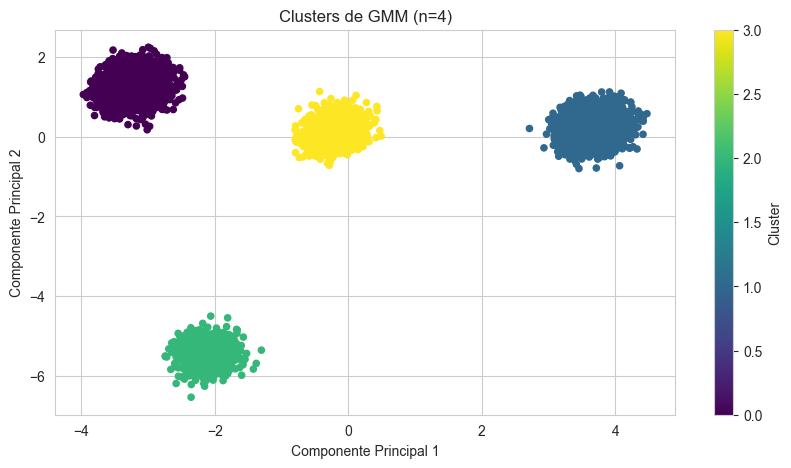

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap="viridis", s=20)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Clusters de GMM (n={best_n_clusters})")
plt.colorbar(label="Cluster")
plt.show()

La gráfica muestra la distribución de los clusters encontrados por el modelo GMM (Gaussian Mixture Model) cuando se selecciona n=4 clusters. Para la visualización, se utilizó una reducción de dimensionalidad con PCA (Análisis de Componentes Principales), proyectando los datos en dos componentes principales.

Cada punto representa una observación en el espacio reducido, coloreada según la asignación de cluster determinada por GMM. Se observa una separación clara entre los grupos, lo que sugiere que el modelo logró una segmentación bien definida de los datos. Además, la distribución elíptica de los clusters es consistente con la naturaleza probabilística del modelo GMM, que permite formas de agrupamiento más flexibles en comparación con K-Means.

In [64]:
unique, counts = np.unique(gmm_labels, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Número de datos")
plt.xticks(unique)
plt.title("Distribución de datos en cada cluster")
plt.show()

Esta gráfica de barras muestra la distribución de datos en cada cluster obtenido mediante el modelo GMM con 4 componentes. En el eje x se presentan las etiquetas de los clusters (0, 1, 2 y 3), mientras que el eje y indica el número de observaciones asignadas a cada cluster.

Se observa que los clusters 0 y 1 contienen la mayoría de los datos, con valores cercanos a 3200-3400 observaciones, mientras que los clusters 2 y 3 tienen una menor cantidad de datos, especialmente el cluster 2, que es el más pequeño con menos de 1000 observaciones. Esta distribución sugiere que el modelo GMM identificó grupos de diferentes tamaños, lo que es característico de su capacidad para modelar distribuciones con distinta densidad.

In [65]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, fill=True, palette="viridis", alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Densidad de clusters en PCA")
plt.show()

Esta gráfica también incorpora un análisis de densidad de los clusters, representado mediante curvas de nivel. Estas curvas indican la concentración de puntos dentro de cada grupo, mostrando que algunos clusters tienen una mayor densidad central mientras que otros presentan una dispersión más amplia. La diferencia en la forma y extensión de los contornos sugiere que los grupos varían en términos de compactación, lo que refuerza la ventaja del GMM sobre K-Means al capturar estructuras más complejas en los datos.

# 4. Análisis de resultados

Se implementaron tres métodos de clustering: K-Means, Agglomerative Clustering y Gaussian Mixture Model (GMM), con el objetivo de identificar patrones ocultos en los datos. En todos los casos, el análisis mostró que la mejor cantidad de clusters era 4, lo que indica que los datos se agrupan naturalmente en cuatro segmentos bien diferenciados. Además, el coeficiente de silueta, una métrica que evalúa la calidad de los clusters formados, arrojó valores muy similares en los tres modelos, con un promedio de 0.77, lo que sugiere que los clusters están bien definidos y separados de manera adecuada.

A pesar de los resultados similares en términos de calidad de la segmentación, se optó por K-Means debido a varias razones clave. En primer lugar, K-Means es más eficiente computacionalmente, ya que su algoritmo de optimización converge rápidamente en comparación con Agglomerative Clustering, que tiene una mayor complejidad computacional debido a su enfoque jerárquico.

Por otro lado, aunque GMM ofrece mayor flexibilidad al modelar clusters con formas elípticas y permite una asignación probabilística de los puntos, esta característica puede generar ambigüedades en la clasificación. En cambio, K-Means asigna cada punto de manera única y determinista a un solo cluster, lo que facilita la interpretación de los resultados y su aplicación en la toma de decisiones.

se consideró que K-Means es el método más sencillo de entender e implementar. Su funcionamiento intuitivo, basado en la asignación de puntos a los centroides más cercanos, permite explicar y aplicar los resultados con facilidad. Además, su estabilidad frente a pequeñas variaciones en los datos lo hace una opción confiable. Por estas razones, se concluyó que K-Means era la mejor elección, al ofrecer un balance entre precisión, eficiencia y facilidad de implementación.

## 4.1 Interpretacion de los clusters: 

In [79]:
copiaEscaldos_1 = df_scaled.copy()
copiaEscaldos_2 = df_scaled.copy()

datos_desEscalados = pd.DataFrame(standard_scaler.inverse_transform(copiaEscaldos_1), columns=df_scaled.columns)



In [80]:
datos_desEscalados

SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0      5323.148883  0.250693  26344.072200       38237.442520     3727.113162   
1     12726.638120  0.791307  37958.519020        5690.742440    18733.810960   
2      4740.988511  0.178076  27399.003840       38246.863490     3402.853375   
3     13820.920640  0.826914  42214.021630        7341.007821    19273.070990   
4     12439.064890  0.706673  40674.226120        6156.208831    19401.475610   
...            ...       ...           ...                ...             ...   
8631   6095.221156  0.234346  27094.007820       35917.204380     3463.821376   
8632  12682.575820  0.686025  38433.618850        5293.541956    18924.799800   
8633  16464.311410  0.189136   4296.196384       32554.759640    11231.500430   
8634  15531.883780  0.117118  12219.325650       31795.971700    12390.432130   
8635   5852.488566  0.166820  32480.936200       32368.357730     2825.555518   

      AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0        15708.239680   0.496536             0.464442          0.821611   
1        38284.354430   0.699457             0.250327          0.654863   
2         6936.812518   0.439666             0.606597          0.783129   
3        40091.347850   0.821412             0.283579          0.501361   
4        32438.912700   0.836764             0.343936          0.527813   
...               ...        ...                  ...               ...   
8631     11711.578890   0.469832             0.539477          0.828321   
8632     34444.867320   0.710331             0.276426          0.546059   
8633     15214.671560   0.424665             0.746010          0.690380   
8634     13856.393210   0.450670             0.805140          0.608737   
8635      8540.930924   0.448753             0.554458          0.863972   

      F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO  \
0              0.194502              100.0       77.0    16819.480040   
1              1.000000               78.0      156.0    15617.570580   
2              0.228299               78.0       83.0    12926.587970   
3              1.000000               88.0      182.0    14404.705070   
4              0.970693              103.0      216.0    14554.911550   
...                 ...                ...        ...             ...   
8631           0.191030               75.0      101.0    17623.810280   
8632           0.935152               95.0      170.0    12433.814930   
8633           1.000000               51.0      151.0     3307.587117   
8634           1.000000               61.0      178.0     6148.232910   
8635           0.202943               87.0       91.0    17179.147460   

             PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  MESES_CLIENTE  
0     21337.027460    39452.95812           0.817907            7.0  
1      8000.183624    63013.74848           0.343119            9.0  
2     23919.113400    38444.21998           0.883984            7.0  
3      6994.688474    62041.61734           0.383186           10.0  
4      8814.239865    58227.56469           0.398377           10.0  
...            ...            ...                ...            ...  
8631  23954.396950    34841.82989           0.866856            7.0  
8632   7375.625322    66726.37299           0.306600           10.0  
8633  22947.759220    54761.96221           0.129242            8.0  
8634  21369.503520    50368.30906           0.087448            8.0  
8635  24703.925210    33166.54256           0.819986            7.0  

[8636 rows x 17 columns]

In [86]:
datos_desEscalados["Cluster"] =  km_model.labels_
copiaEscaldos_2["Cluster"] =  km_model.labels_

In [87]:
df_clusters = datos_desEscalados.groupby("Cluster").mean()
df_clusters = df_clusters.reset_index()
df_clusters


Cluster         SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
0        0   4451.126307  0.193317  29747.057865       35140.273594   
1        1  13252.473365  0.775734  40656.032468        6132.662569   
2        2   3105.917172  0.583910  26323.521692       31054.681489   
3        3  16285.111896  0.181718   7392.765979       31408.672313   

   COMPRAS_PLAZOS  AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  \
0     3313.474409     11129.239338   0.425684             0.567289   
1    19462.256862     37231.770958   0.797725             0.227979   
2    10485.803990      9355.103901   0.206352             0.797868   
3    10932.107058     21763.987743   0.513926             0.702533   

   F_COMPRAS_PLAZOS  F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO   P_COMPRAS  \
0          0.838328           0.201070          80.939451   85.725008   
1          0.534946           0.969286          92.581049  206.825089   
2          0.178405           1.000000          29.837209  284.805094   
3          0.642639           0.969525          52.631841  166.533167   

   LÍMITE_CREDITO         PAGOS  PAGOS_MINIMOS  F_PAGOS_COMPLETOS  \
0    15523.980921  24623.728686   32951.234081           0.837494   
1    14534.185216   8548.249145   58146.385395           0.363650   
2    26109.000090  43726.525314   17429.339551           0.723273   
3     4386.390604  20649.435423   55187.141515           0.149516   

   MESES_CLIENTE  
0       6.363923  
1       9.859058  
2      10.598007  
3       7.826700

El análisis de los clusters se realizó utilizando los datos desescalados, lo que permite interpretar las características reales de cada grupo de clientes. A continuación, se detallan las observaciones clave de cada cluster:

* **Cluster 0:** Se caracteriza por un saldo promedio de 4,451.13, con compras anuales de 29,747.06 en su mayoría puntuales (35,140.27), mientras que las compras a plazos son significativamente menores (3,313.47). Además, tienen un límite de crédito de 15,523.98 y realizan pagos completos en un 83.75% de las ocasiones. Esto sugiere un perfil de clientes con comportamiento financiero estable, que prefieren realizar compras de contado y tienen un manejo adecuado de su crédito.

* **Cluster 1:** Este presenta un saldo promedio de (13,252.47) y un alto uso de avances en efectivo (37,231.77), lo que representa el 96.93% de sus movimientos. Sus compras totales son de 40,656.03, pero con un alto porcentaje de compras a plazos (19,462.25), lo que indica una preferencia por el financiamiento. Además, su porcentaje de pagos completos es bajo (36.37%), lo que podría sugerir un mayor riesgo de impago o una dependencia del crédito rotativo.

* **Cluster 2:** Agrupa clientes con un saldo menor (3,105.91), pero con un comportamiento de compras muy particular. Sus compras totales son de 26,323.52, con una alta proporción de compras puntuales (31,054.68) y un bajo uso de avances en efectivo (9,355.10). Además, su porcentaje de pagos completos es del 72.33%, indicando que, aunque usan crédito, suelen manejarlo responsablemente. También presentan el mayor límite de crédito (284,805.09), lo que podría deberse a un historial financiero favorable.

* **Cluster 3:** Presenta el saldo promedio más alto (16,285.11), pero con compras significativamente menores (7,392.76). La mayoría de sus compras son a plazos (31,408.67) y tiene un uso intermedio de avances en efectivo (21,763.98). Su límite de crédito es de 166,533.16, menor que el de otros grupos, y su porcentaje de pagos completos es el más bajo de todos (14.95%), lo que podría sugerir que enfrentan dificultades para pagar sus obligaciones o dependen en gran medida del crédito.

Estos hallazgos reflejan distintos perfiles de clientes, desde aquellos con comportamientos financieros estables hasta aquellos con un alto uso del crédito y mayor riesgo. Esta información es clave para diseñar estrategias personalizadas, optimizando la gestión de crédito y la oferta de productos financieros para cada segmento.

In [88]:
df_clusters_est = copiaEscaldos_2.groupby("Cluster").mean()
df_clusters_est = df_clusters_est.reset_index()
df_clusters_est

Cluster     SALDO   F_SALDO   COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0        0 -0.963321 -0.938418 -0.068786           0.900768       -1.141530   
1        1  0.755698  1.119749  0.919100          -1.237312        1.137296   
2        2 -1.226059  0.441873 -0.378812           0.599629       -0.129411   
3        3  1.348012 -0.979409 -2.093128           0.625720       -0.066431   

   AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0        -0.909077  -0.626326             0.400909          1.029872   
1         1.164573   1.113058            -1.129929         -0.428604   
2        -1.050019  -1.651757             1.441192         -2.142641   
3        -0.064226  -0.213770             1.011080          0.089115   

   F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO     PAGOS  \
0          -1.301454           0.214628  -1.110895        0.150761  0.434241   
1           0.741516           0.738173   0.588543       -0.028337 -1.018667   
2           0.823196          -2.083540   1.682862        2.066057  2.160759   
3           0.742152          -1.058421   0.023113       -1.864521  0.075043   

   PAGOS_MINIMOS  F_PAGOS_COMPLETOS  MESES_CLIENTE  
0      -0.728819           1.091477      -1.142236  
1       0.900065          -0.678772       0.848693  
2      -1.732320           0.664754       1.269620  
3       0.708748          -1.478762      -0.308997

El análisis de los clusters se realizó utilizando los datos escalados, lo que permite identificar patrones relativos entre las variables y cómo se agrupan los clientes en función de sus características financieras. A continuación, se detallan las observaciones clave de cada cluster:

Cluster 0 (Usuarios con bajo uso del crédito y financiamiento moderado):
Tienen un saldo promedio negativo (-0.96), lo que indica bajos fondos disponibles. Su frecuencia de compras es baja (-0.94), lo que sugiere que no usan mucho su tarjeta. Sin embargo, recurren a compras a plazos (0.90), lo que implica que cuando compran, prefieren financiar. Su límite de crédito es bajo (-1.11), y su frecuencia de pagos completos también es negativa (-0.72), lo que indica dificultades para pagar todo el saldo.

Cluster 1 (Usuarios activos con preferencia por pagos inmediatos):
Mantienen un saldo positivo (0.75) y usan con frecuencia su tarjeta (1.12). Prefieren hacer compras puntuales (0.91) en lugar de a plazos (-1.23), lo que sugiere que liquidan sus gastos rápidamente. Su límite de crédito es 0.58, superior al promedio, y su frecuencia de pagos completos es alta (0.90), lo que indica buen control financiero.

Cluster 2 (Usuarios con alto endeudamiento y dependencia del crédito):
Presentan el saldo más bajo (-1.22), pero siguen comprando (0.44). Destacan por su alta frecuencia de compras a plazos (1.44), lo que indica que dependen del financiamiento para consumir. Sin embargo, su frecuencia de pagos completos es la más baja (-1.73), lo que sugiere dificultades para pagar a tiempo. A pesar de esto, tienen el mayor límite de crédito (1.68), lo que indica que las entidades financieras aún les otorgan acceso a crédito.

Cluster 3 (Usuarios con alta liquidez pero bajo uso del crédito):
Tienen el saldo más alto (1.34), lo que indica que cuentan con fondos disponibles. Sin embargo, su frecuencia de compras es la más baja (-0.97), lo que sugiere que no usan mucho su tarjeta. A pesar de ello, cuando compran, prefieren hacerlo a plazos (1.01). Su límite de crédito es casi nulo (0.02), lo que puede ser una restricción impuesta por las entidades financieras.


In [89]:
Columas = df_clusters.columns.tolist()
cluster_0 = df_clusters.iloc[0].tolist()  
cluster_1 = df_clusters.iloc[1].tolist()  
cluster_3 = df_clusters.iloc[2].tolist()  
cluster_4 = df_clusters.iloc[3].tolist() 


In [90]:
Columas_2= df_clusters_est.columns.tolist()
cluster_0_2 = df_clusters_est.iloc[0].tolist()  
cluster_1_2 = df_clusters_est.iloc[1].tolist()  
cluster_3_2 = df_clusters_est.iloc[2].tolist()  
cluster_4_2 = df_clusters_est.iloc[3].tolist() 

In [91]:

angles=np.linspace(0,2*np.pi,len(Columas), endpoint=False)
print(angles)

angles_2=np.linspace(0,2*np.pi,len(Columas), endpoint=False)
print(angles_2)

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265 3.4906585  3.83972435
 4.1887902  4.53785606 4.88692191 5.23598776 5.58505361 5.93411946]
[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265 3.4906585  3.83972435
 4.1887902  4.53785606 4.88692191 5.23598776 5.58505361 5.93411946]


In [92]:
angles=np.concatenate((angles,[angles[0]]))
Columas.append(Columas[0])
cluster_0.append(cluster_0[0])
cluster_1.append(cluster_1[0])
cluster_3.append(cluster_3[0])
cluster_4.append(cluster_4[0])

In [93]:
angles_2=np.concatenate((angles_2,[angles_2[0]]))
Columas_2.append(Columas[0])
cluster_0_2.append(cluster_0_2[0])
cluster_1_2.append(cluster_1_2[0])
cluster_3_2.append(cluster_3_2[0])
cluster_4_2.append(cluster_4_2[0])

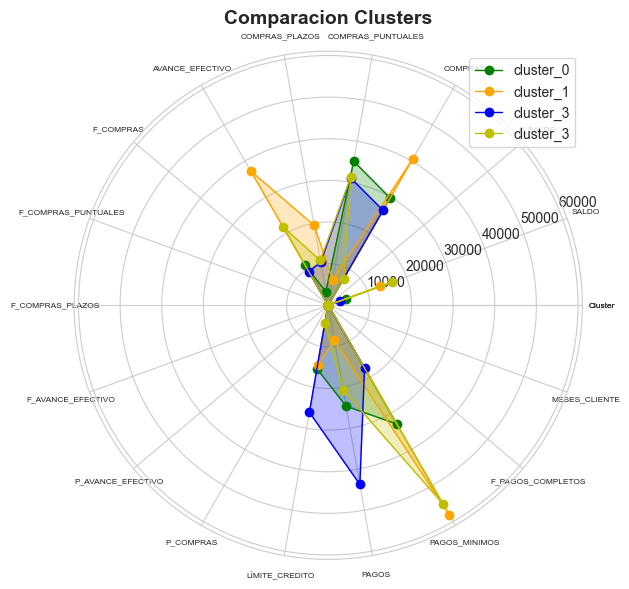

In [94]:
fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111, polar=True)

ax.plot(angles,cluster_0, 'o-', color='g', linewidth=1, label='cluster_0')
ax.fill(angles, cluster_0, alpha=0.25, color='g')

ax.plot(angles,cluster_1, 'o-', color='orange', linewidth=1, label='cluster_1')
ax.fill(angles, cluster_1, alpha=0.25, color='orange')

ax.plot(angles,cluster_3, 'o-', color='b', linewidth=1, label='cluster_3')
ax.fill(angles, cluster_3, alpha=0.25, color='b')

ax.plot(angles,cluster_4, 'o-', color='y', linewidth=1, label='cluster_3')
ax.fill(angles, cluster_4, alpha=0.25, color='y')
ax.set_thetagrids(angles_2 * 180 / np.pi, Columas, fontsize=6)
ax.set_title("Comparacion Clusters", fontsize=14, fontweight='bold', pad=20)


plt.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

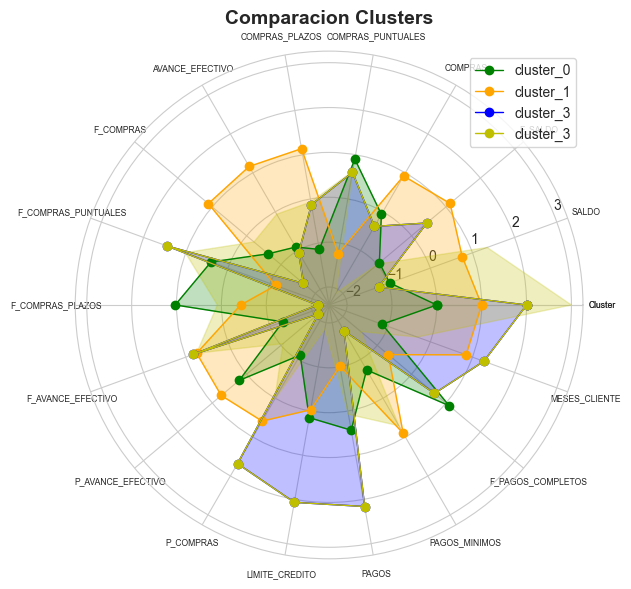

In [95]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111, polar=True)

ax.plot(angles_2,cluster_0_2, 'o-', color='g', linewidth=1, label='cluster_0')
ax.fill(angles_2, cluster_0_2, alpha=0.25, color='g')

ax.plot(angles_2,cluster_1_2, 'o-', color='orange', linewidth=1, label='cluster_1')
ax.fill(angles_2, cluster_1_2, alpha=0.25, color='orange')

ax.plot(angles_2,cluster_3_2, 'o-', color='b', linewidth=1, label='cluster_3')
ax.fill(angles_2, cluster_3_2, alpha=0.25, color='b')

ax.plot(angles_2,cluster_3_2, 'o-', color='y', linewidth=1, label='cluster_3')
ax.fill(angles_2, cluster_4_2, alpha=0.25, color='y')
#ax.set_thetagrids(angles_2 * 180/np.pi, Columas)
ax.set_thetagrids(angles_2 * 180 / np.pi, Columas, fontsize=6.2)


ax.set_title("Comparacion Clusters", fontsize=14, fontweight='bold', pad=20)

plt.legend(loc='upper right')#, bbox_to_anchor=(1.2, 1.1))

plt.grid(True)
plt.tight_layout()
#plt.legend()
plt.show()

El análisis de los clusters en el gráfico de radar revela patrones de comportamiento financiero diferenciados entre los grupos. Cluster 0 (verde) muestra un perfil equilibrado, con valores moderados en casi todas las variables, destacándose en compras a plazos y pagos completos, lo que sugiere clientes con hábitos de pago estables. Cluster 1 (naranja) se distingue por altos valores en compras y avances en efectivo, lo que indica un perfil de clientes con un mayor uso del crédito y menor enfoque en pagos mínimos. Cluster 3 (azul) presenta altos valores en límite de crédito y pagos, pero menores en avances en efectivo, lo que sugiere clientes con mayor capacidad financiera y mejor comportamiento de pago. Finalmente, el cluster amarillo tiene una dispersión similar a los otros clusters, pero con un comportamiento más heterogéneo, destacándose en variables como saldo y frecuencia de pagos completos. Estos resultados pueden ayudar a diseñar estrategias de segmentación para optimizar productos y servicios financieros según las características de cada grupo.

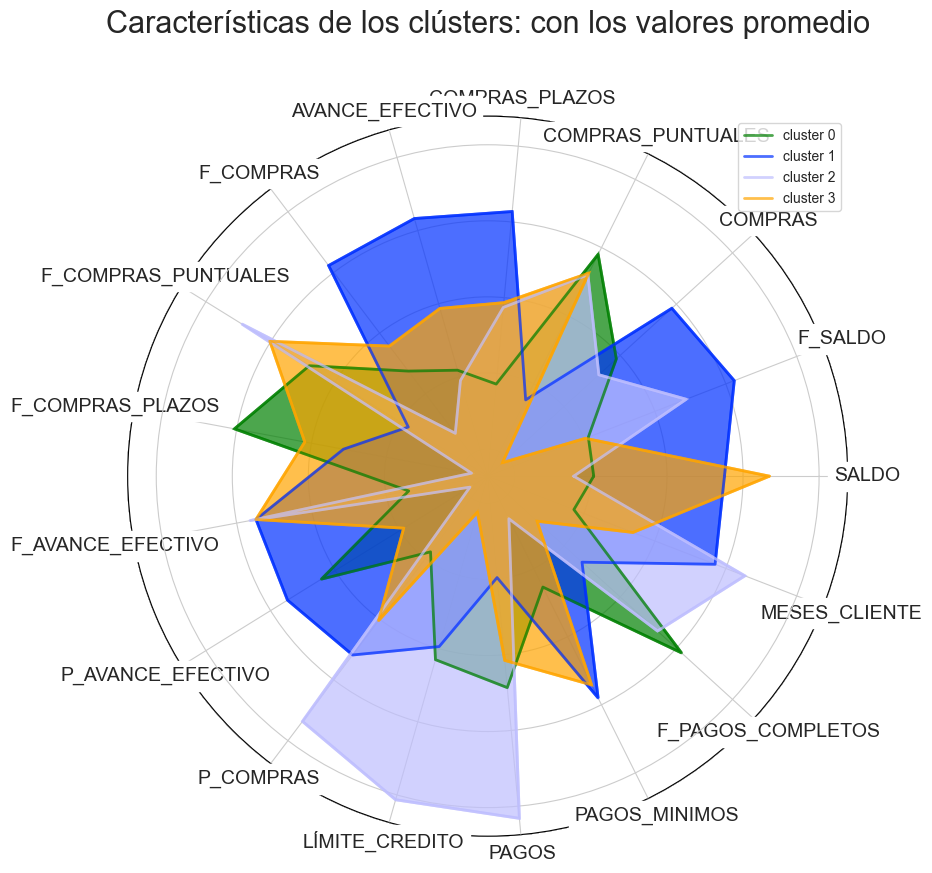

In [113]:
datos_desEscalados["Cluster"] =  km_model.labels_
copiaEscaldos_2["Cluster"] =  km_model.labels_

X = datos_desEscalados
X_std  = copiaEscaldos_2

X_mean = pd.concat([pd.DataFrame(X.mean().drop('Cluster'), columns=['mean']), 
                   X.groupby('Cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(X_std.mean().drop('Cluster'), columns=['mean']), 
                   X_std.groupby('Cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)
cluster_colors = ['#008001', '#0030ff', '#bebefe', '#ffa500',]

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(8, 8))
no_features = len(km_model.feature_names_in_)
radar = Radar(fig, km_model.feature_names_in_, np.unique(km_model.labels_))

for k in range(0,km_model.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Características de los clústers: con los valores promedio", size=22, pad=60)
plt.show()

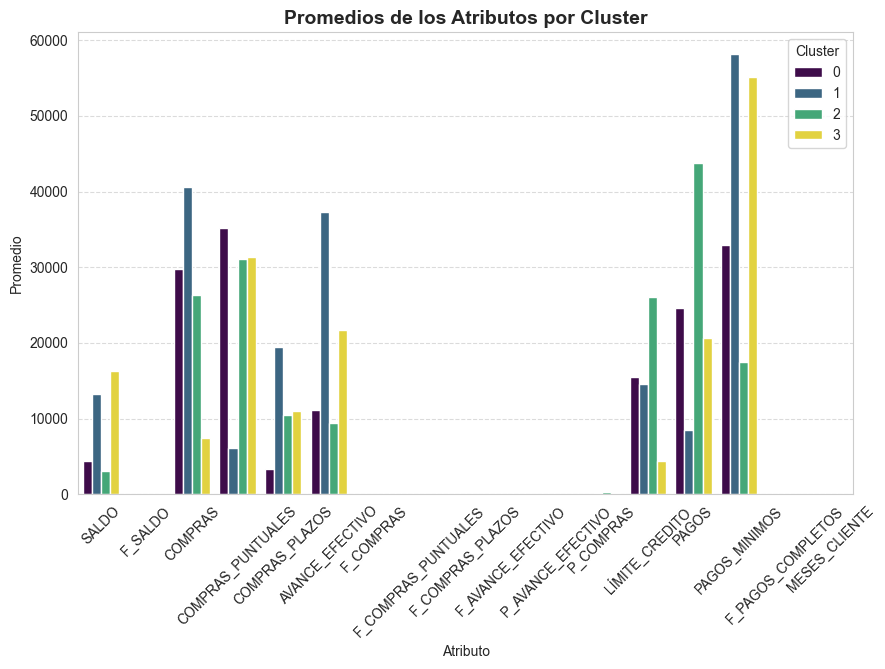

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_clusters tiene los promedios y una columna "Cluster"
df_melted = df_clusters.melt(id_vars="Cluster", var_name="Atributo", value_name="Promedio")

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="Atributo", y="Promedio", hue="Cluster", palette="viridis")

plt.xticks(rotation=45)  # Rota los labels si hay muchos atributos
plt.title("Promedios de los Atributos por Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Atributo")
plt.ylabel("Promedio")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


El gráfico muestra la distribución de los promedios de distintos atributos financieros para cada uno de los clusters identificados en el análisis. Se pueden observar diferencias significativas entre los grupos, lo que sugiere patrones diferenciados en el comportamiento de los clientes bancarios. En términos de saldo y límite de crédito, algunos clusters presentan valores considerablemente más altos, lo que indica que ciertos clientes tienen mayor acceso a financiamiento y mantienen montos elevados en sus cuentas. Esto puede estar relacionado con su capacidad de pago y con el nivel de confianza que la entidad financiera les otorga. El comportamiento de compra también varía entre los clusters. Algunos grupos realizan compras frecuentes y de alto valor, mientras que otros tienen un nivel de gasto más moderado. Además, la preferencia entre compras puntuales y compras a plazos no es uniforme, lo que indica distintos enfoques en la gestión del consumo y el uso del crédito.

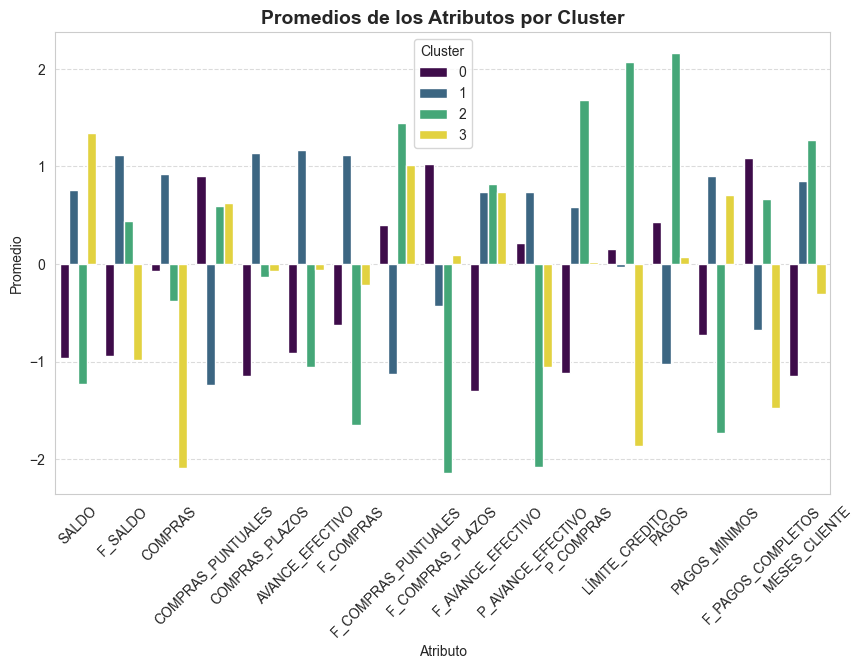

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_clusters tiene los promedios y una columna "Cluster"
df_melted_2 = df_clusters_est.melt(id_vars="Cluster", var_name="Atributo", value_name="Promedio")

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted_2, x="Atributo", y="Promedio", hue="Cluster", palette="viridis")

plt.xticks(rotation=45)  # Rota los labels si hay muchos atributos
plt.title("Promedios de los Atributos por Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Atributo")
plt.ylabel("Promedio")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


El gráfico muestra los promedios de distintos atributos financieros segmentados por cluster, evidenciando diferencias significativas entre los grupos. El Cluster 2 presenta los valores más altos en límite de crédito y avances en efectivo, indicando un perfil con mayor capacidad de financiamiento. El Cluster 1 destaca en compras y pagos completos, sugiriendo un comportamiento más responsable con el crédito. En contraste, el Cluster 3 exhibe valores negativos en compras a plazos y pagos mínimos, lo que podría indicar mayor riesgo financiero. Por otro lado, el Cluster 0 muestra un comportamiento más equilibrado pero con menor actividad en transacciones. Este análisis permite identificar patrones de uso del crédito y diseñar estrategias personalizadas para cada segmento de clientes.

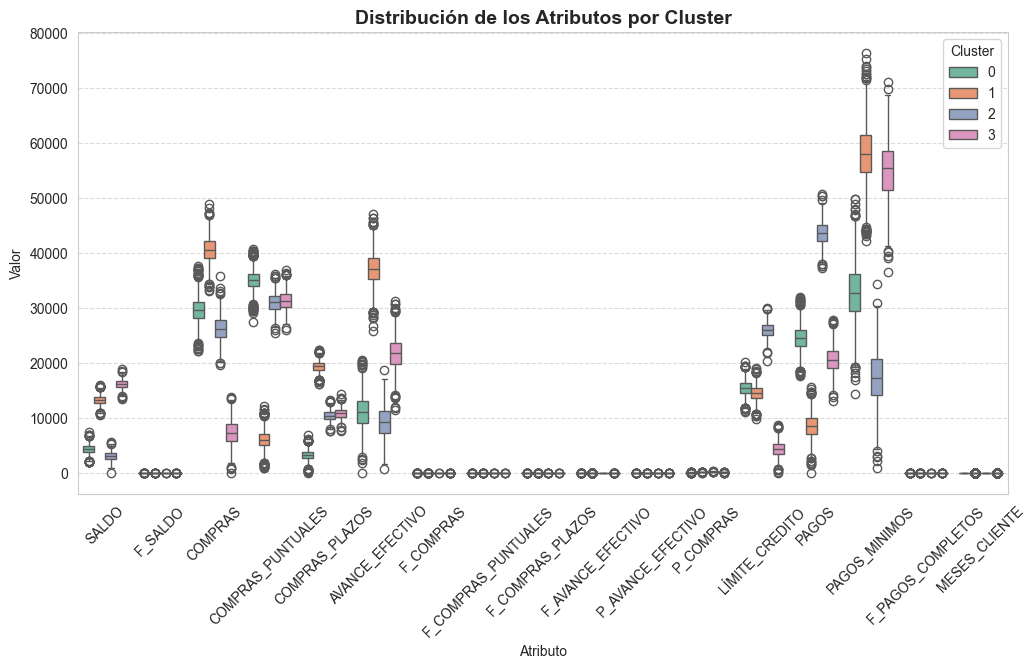

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar boxplots de todos los atributos agrupados por Cluster
df_melted_3 = datos_desEscalados.melt(id_vars="Cluster", var_name="Atributo", value_name="Valor")

sns.boxplot(data=df_melted_3, x="Atributo", y="Valor", hue="Cluster", palette="Set2")

# Ajustes del gráfico
plt.xticks(rotation=45)  # Rota los labels si hay muchos atributos
plt.title("Distribución de los Atributos por Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Atributo")
plt.ylabel("Valor")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


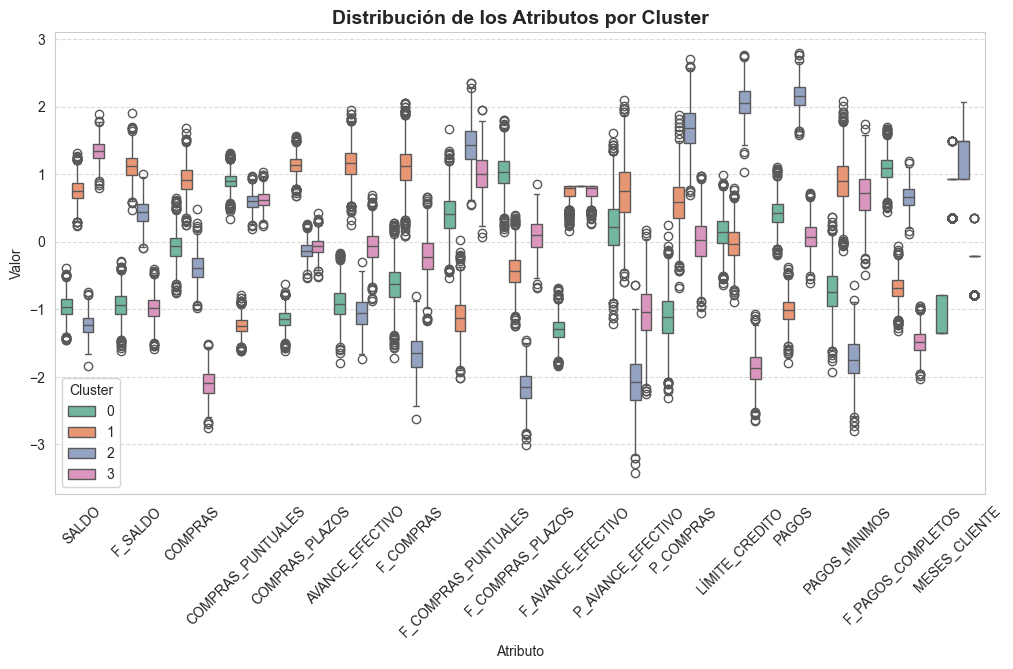

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar boxplots de todos los atributos agrupados por Cluster
df_melted_3 = copiaEscaldos_2.melt(id_vars="Cluster", var_name="Atributo", value_name="Valor")

sns.boxplot(data=df_melted_3, x="Atributo", y="Valor", hue="Cluster", palette="Set2")

# Ajustes del gráfico
plt.xticks(rotation=45)  # Rota los labels si hay muchos atributos
plt.title("Distribución de los Atributos por Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Atributo")
plt.ylabel("Valor")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

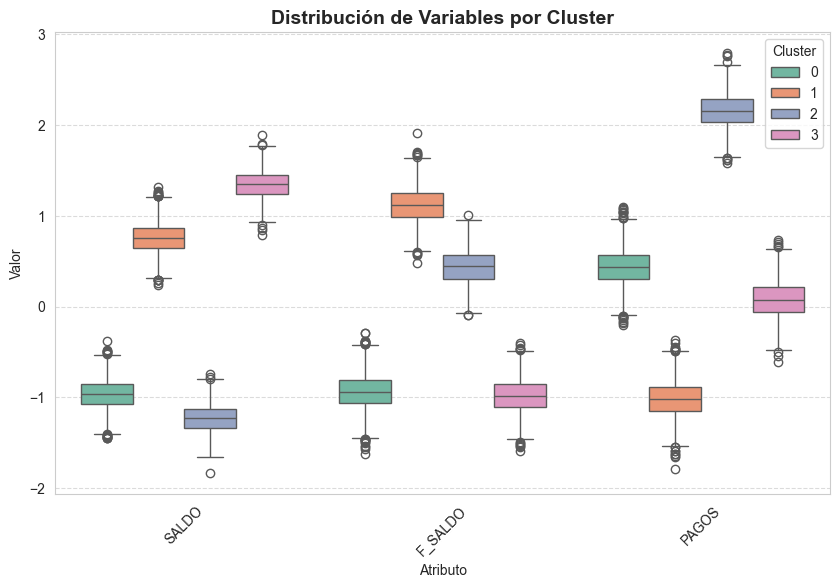

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns


variables_interes = ["SALDO", "F_SALDO", "PAGOS"]  # Reemplaza con tus nombres reales


df_filtrado = copiaEscaldos_2[variables_interes + ["Cluster"]]


df_melted_4 = df_filtrado.melt(id_vars="Cluster", var_name="Atributo", value_name="Valor")


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted_4, x="Atributo", y="Valor", hue="Cluster", palette="Set2")

plt.xticks(rotation=45)  
plt.title("Distribución de Variables por Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Atributo")
plt.ylabel("Valor")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


El análisis de la distribución de las variables SALDO, F_SALDO y PAGOS por cluster revela diferencias significativas entre los grupos de clientes. El Cluster 2 se destaca por tener los valores más altos en pagos, lo que indica un comportamiento financiero más activo. Por otro lado, los Clusters 1 y 3 presentan mayores saldos en promedio, aunque con diferencias en la dispersión de los datos. En contraste, el Cluster 0 agrupa a clientes con menores saldos y pagos más reducidos, lo que sugiere una menor capacidad financiera. Estas diferencias pueden ser clave para definir estrategias de segmentación y ofrecer productos ajustados a cada perfil de cliente.